In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Previous cell doesn't add this, so done manually
sys.path.append('C:\\Users\\bde2002.53381\\Desktop\\master-thesis')

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import random
from datetime import date
import datetime as DT
from datetime import datetime
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from collections import Counter
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold

from quality_evaluation.predictive_metrics import *

In [4]:
## Assuming that data is prepared:
# - target variable is added and last column
# - variables are added (age) and removed (dates, vital status)
# - categorical variables are encoded appropriatley (ordinal vs nominal)
# - missing values are handled appropriately
# - dummy columns to be dropped are specified outside of function or during preparation

In [5]:
# Load the original and validation dataframes
df_ori = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\df_ori_1_binned_p.csv") # This is the original data WITHOUT the holdout validation set
df_ori_val = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\df_val_1_binned_p.csv")

In [6]:
epsilon_names = ['10','1','0_1','0_01','0_001']
ms_privacy_levels = []
pb_privacy_levels = []

g = globals()

# The following cells lead to a list (e.g. syn_10) with all the versions of that privacy level, 
# and then to a list privacy_levels that contains all these sublists of the different privay levels with their versions

In [7]:
# Load ms dataframes for dataset 1
for epsilon in epsilon_names:
    syn_name = 'ms_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\ms\\ms_df_syn_1_e{}_v{}_p.csv".format(epsilon, versie))
        g[syn_name].append(df)
    ms_privacy_levels.append(g[syn_name])

In [8]:
# Load pb dataframes for dataset 1
for epsilon in epsilon_names:
    syn_name = 'pb_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\pb\\pb_df_syn_1_e{}_v{}_p.csv".format(epsilon, versie))
        g[syn_name].append(df)
    pb_privacy_levels.append(g[syn_name])

In [9]:
# Dropdummies and num_vars should be specified or can be left None if already taken care of during preperation
dropdummies = ['stage_2A', 'subloc_7', "diagnosis_age_71-90", "lymph_pos_0"]
num_vars = ['tum_differentiatiegraad_code', 'pat_geslacht_code']
models = [LogisticRegression(), DecisionTreeClassifier()]

In [10]:
LRscores, DTscores = FIDbenchmarking(models, df_ori, dropdummies=None, num_vars=num_vars)

fold 1
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
model LogisticRegression()
best parameters: LogisticRegression(C=1, max_iter=4000)
mean 0.7511710209114314
std 0.005315345374808586
model DecisionTreeClassifier()
best parameters: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
mean 0.6988025351286129
std 0.01121618322963761
fold 2
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
model LogisticRegression(C=1, max_iter=4000)
best parameters: LogisticRegression(C=10, max_iter=4000)
mean 0.7521645326849807
std 0.005989449436716943
model DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
best parameters: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
mean 0.7010277557504703
std 0.019555511422877196
fold 3
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
model LogisticRegression(C=10, max_iter

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
ori: LogisticRegression(C=10, max_iter=4000)
accuracy of original model is 0.7558280351195883
Feature: pat_geslacht_code Score: 0.12264
Feature: tum_differentiatiegraad_code Score: 0.09018
Feature: subloc_0 Score: 0.01105
Feature: subloc_2 Score: 0.00682
Feature: subloc_3 Score: 0.03665
Feature: subloc_4 Score: 0.04029
Feature: subloc_5 Score: 0.02994
Feature: subloc_6 Score: 0.01705
Feature: subloc_7 Score: 0.07178
Feature: subloc_8 Score: 0.01808
Feature: subloc_9 Score: 0.05044
Feature: stage_1 Score: 0.82896
Feature: stage_2 Score: 0.49425
Feature: stage_2A Score: 0.77217
Feature: stage_2B Score: 0.18763
Feature: stage_2C Score: 0.07368
Feature: stage_3 Score: 0.22181
Feature: stage_3A Score: 0.20600
Feature: stage_3B Score: 0.37506
Feature: stage_3C Score: 0.06133
Feature: stage_4 Score: 0.52766
Feature: stage_4A Score: 0.32193
Feature: stage_4B Score: 0.60583
Feat

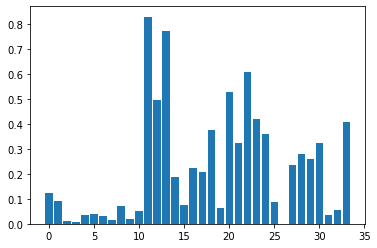

Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=0.0001, max_iter=4000)
Feature: pat_geslacht_code Score: 0.00243
Feature: tum_differentiatiegraad_code Score: 0.00031
Feature: subloc_0 Score: 0.00149
Feature: subloc_2 Score: 0.00084
Feature: subloc_3 Score: 0.00025
Feature: subloc_4 Score: 0.00235
Feature: subloc_5 Score: 0.00120
Feature: subloc_6 Score: 0.00120
Feature: subloc_7 Score: 0.00376
Feature: subloc_8 Score: 0.00005
Feature: subloc_9 Score: 0.00028
Feature: stage_1 Score: 0.00056
Feature: stage_2 Score: 0.00121
Feature: stage_2A Score: 0.00178
Feature: stage_2B Score: 0.00027
Feature: stage_2C Score: 0.00005
Feature: stage_3 Score: 0.00006
Feature: stage_3A Score: 0.00069
Feature: stage_3B Score: 0.00066
Feature: stage_3C Score: 0.00053
Feature: stage_4 Score: 0.00041
Feature: stage_4A Score: 0.00065
Feature: stage_4B Score: 0.00030
Feature: stage_4C Score: 0.00005
Feature: stage_M Score: 0.00039
Feature: stage_X Sco

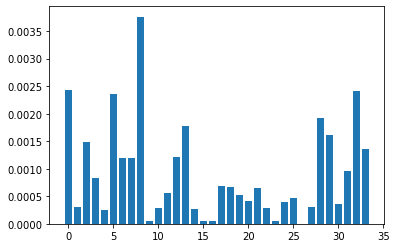

Attribute pat_geslacht_code has RMSE feature importance difference 0.014448220715540779
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008076557512663002
Attribute subloc_0 has RMSE feature importance difference 9.128537152778397e-05
Attribute subloc_2 has RMSE feature importance difference 3.579035135597115e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013253403474866297
Attribute subloc_4 has RMSE feature importance difference 0.0014392910675734092
Attribute subloc_5 has RMSE feature importance difference 0.0008259646273733091
Attribute subloc_6 has RMSE feature importance difference 0.0002511136163785532
Attribute subloc_7 has RMSE feature importance difference 0.004626576770732408
Attribute subloc_8 has RMSE feature importance difference 0.0003250815595314809
Attribute subloc_9 has RMSE feature importance difference 0.0025159585341432374
Attribute stage_1 has RMSE feature importance difference 0.6862475332230029
Attribute stage_2 

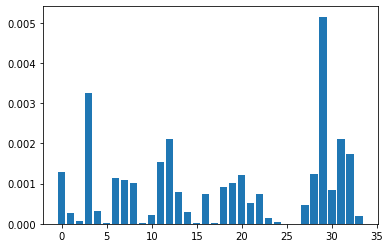

Attribute pat_geslacht_code has RMSE feature importance difference 0.014724795111976075
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008083081564589374
Attribute subloc_0 has RMSE feature importance difference 0.00012066716559249329
Attribute subloc_2 has RMSE feature importance difference 1.2787933420368611e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013198157982441518
Attribute subloc_4 has RMSE feature importance difference 0.0016209376900230407
Attribute subloc_5 has RMSE feature importance difference 0.0008294703883036229
Attribute subloc_6 has RMSE feature importance difference 0.000254736129668565
Attribute subloc_7 has RMSE feature importance difference 0.005007880033520872
Attribute subloc_8 has RMSE feature importance difference 0.0003258718043797042
Attribute subloc_9 has RMSE feature importance difference 0.0025226058579199463
Attribute stage_1 has RMSE feature importance difference 0.684632830027639
Attribute stage_2 

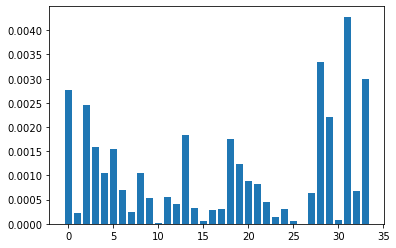

Attribute pat_geslacht_code has RMSE feature importance difference 0.014369582252173108
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008090533394871573
Attribute subloc_0 has RMSE feature importance difference 7.374123784351598e-05
Attribute subloc_2 has RMSE feature importance difference 2.730620620020603e-05
Attribute subloc_3 has RMSE feature importance difference 0.0012677403808924335
Attribute subloc_4 has RMSE feature importance difference 0.0015019941706115522
Attribute subloc_5 has RMSE feature importance difference 0.0008550253725677823
Attribute subloc_6 has RMSE feature importance difference 0.00028256857568181105
Attribute subloc_7 has RMSE feature importance difference 0.005003199231931355
Attribute subloc_8 has RMSE feature importance difference 0.0003081518271414651
Attribute subloc_9 has RMSE feature importance difference 0.0025434609957203716
Attribute stage_1 has RMSE feature importance difference 0.6862580091318273
Attribute stage_2

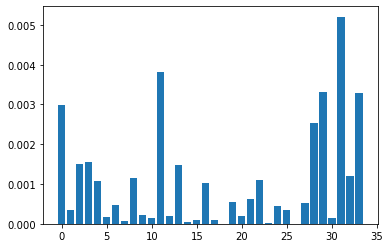

Attribute pat_geslacht_code has RMSE feature importance difference 0.014316132959169758
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008071242653039785
Attribute subloc_0 has RMSE feature importance difference 9.105958849914628e-05
Attribute subloc_2 has RMSE feature importance difference 2.766622791801139e-05
Attribute subloc_3 has RMSE feature importance difference 0.0012658896939480996
Attribute subloc_4 has RMSE feature importance difference 0.0016097309355513985
Attribute subloc_5 has RMSE feature importance difference 0.0008680628940868956
Attribute subloc_6 has RMSE feature importance difference 0.00028850136912411586
Attribute subloc_7 has RMSE feature importance difference 0.00498921280249118
Attribute subloc_8 has RMSE feature importance difference 0.0003193541323033106
Attribute subloc_9 has RMSE feature importance difference 0.002530557456839795
Attribute stage_1 has RMSE feature importance difference 0.68087383548818
Attribute stage_2 has

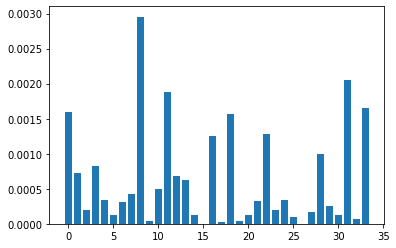

Attribute pat_geslacht_code has RMSE feature importance difference 0.014651517889416477
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008002124352935333
Attribute subloc_0 has RMSE feature importance difference 0.00011763537300573944
Attribute subloc_2 has RMSE feature importance difference 3.588717947154312e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013189082992063797
Attribute subloc_4 has RMSE feature importance difference 0.001612955683604476
Attribute subloc_5 has RMSE feature importance difference 0.0008777000775023044
Attribute subloc_6 has RMSE feature importance difference 0.0002764589083571074
Attribute subloc_7 has RMSE feature importance difference 0.0047369220058382676
Attribute subloc_8 has RMSE feature importance difference 0.00032550656059112217
Attribute subloc_9 has RMSE feature importance difference 0.0024943369593547204
Attribute stage_1 has RMSE feature importance difference 0.6840711326306922
Attribute stage_

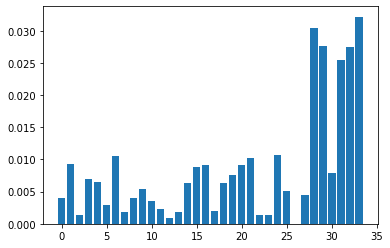

Attribute pat_geslacht_code has RMSE feature importance difference 0.014065539416033375
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.006536505637559326
Attribute subloc_0 has RMSE feature importance difference 9.404381468821288e-05
Attribute subloc_2 has RMSE feature importance difference 3.572954787465309e-08
Attribute subloc_3 has RMSE feature importance difference 0.0009059149447245673
Attribute subloc_4 has RMSE feature importance difference 0.001395302669986356
Attribute subloc_5 has RMSE feature importance difference 0.0003769826970752868
Attribute subloc_6 has RMSE feature importance difference 0.00023085097207538235
Attribute subloc_7 has RMSE feature importance difference 0.004589197451511689
Attribute subloc_8 has RMSE feature importance difference 0.00015884784684356044
Attribute subloc_9 has RMSE feature importance difference 0.002199414794534022
Attribute stage_1 has RMSE feature importance difference 0.6833543537346692
Attribute stage_2 

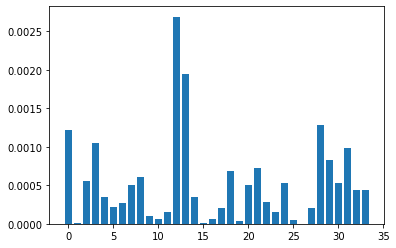

Attribute pat_geslacht_code has RMSE feature importance difference 0.014741416885979396
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008131397677235981
Attribute subloc_0 has RMSE feature importance difference 0.00011001481059650867
Attribute subloc_2 has RMSE feature importance difference 3.336823590363186e-05
Attribute subloc_3 has RMSE feature importance difference 0.001318318340750768
Attribute subloc_4 has RMSE feature importance difference 0.0016055276310179354
Attribute subloc_5 has RMSE feature importance difference 0.000879933709036068
Attribute subloc_6 has RMSE feature importance difference 0.00027371409045718345
Attribute subloc_7 has RMSE feature importance difference 0.005064672061569665
Attribute subloc_8 has RMSE feature importance difference 0.00032337973121291085
Attribute subloc_9 has RMSE feature importance difference 0.0025381353031875705
Attribute stage_1 has RMSE feature importance difference 0.6869169954614999
Attribute stage_2

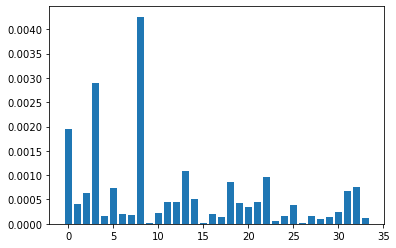

Attribute pat_geslacht_code has RMSE feature importance difference 0.014567113522158582
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008057981930532265
Attribute subloc_0 has RMSE feature importance difference 0.00010856635929769331
Attribute subloc_2 has RMSE feature importance difference 1.5464584330827546e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013320869003427467
Attribute subloc_4 has RMSE feature importance difference 0.0015650485167925834
Attribute subloc_5 has RMSE feature importance difference 0.0008841241561521022
Attribute subloc_6 has RMSE feature importance difference 0.0002841351871849185
Attribute subloc_7 has RMSE feature importance difference 0.004559172851956748
Attribute subloc_8 has RMSE feature importance difference 0.0003264505232537223
Attribute subloc_9 has RMSE feature importance difference 0.002522400725641926
Attribute stage_1 has RMSE feature importance difference 0.6864469514658476
Attribute stage_2

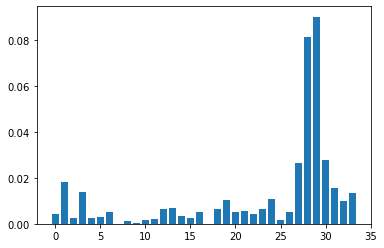

Attribute pat_geslacht_code has RMSE feature importance difference 0.014057491368030322
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0051853791586898325
Attribute subloc_0 has RMSE feature importance difference 7.586955491192038e-05
Attribute subloc_2 has RMSE feature importance difference 4.736681830634453e-05
Attribute subloc_3 has RMSE feature importance difference 0.0011514285519011818
Attribute subloc_4 has RMSE feature importance difference 0.0013876011340893735
Attribute subloc_5 has RMSE feature importance difference 0.0006166562736574157
Attribute subloc_6 has RMSE feature importance difference 0.0002904675455669462
Attribute subloc_7 has RMSE feature importance difference 0.004988840562452517
Attribute subloc_8 has RMSE feature importance difference 0.00032096723709949495
Attribute subloc_9 has RMSE feature importance difference 0.0023954558387869105
Attribute stage_1 has RMSE feature importance difference 0.6835712274182758
Attribute stage_

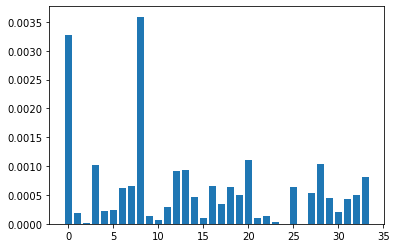

Attribute pat_geslacht_code has RMSE feature importance difference 0.014247014791118931
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00809883331742388
Attribute subloc_0 has RMSE feature importance difference 0.00012167094996719766
Attribute subloc_2 has RMSE feature importance difference 3.3685793798361814e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013268157439765462
Attribute subloc_4 has RMSE feature importance difference 0.001604665872584313
Attribute subloc_5 has RMSE feature importance difference 0.0008597174746061677
Attribute subloc_6 has RMSE feature importance difference 0.00026842758207218853
Attribute subloc_7 has RMSE feature importance difference 0.004649711973906181
Attribute subloc_8 has RMSE feature importance difference 0.0003222052126393773
Attribute subloc_9 has RMSE feature importance difference 0.0025387396567629096
Attribute stage_1 has RMSE feature importance difference 0.686700499291315
Attribute stage_2 

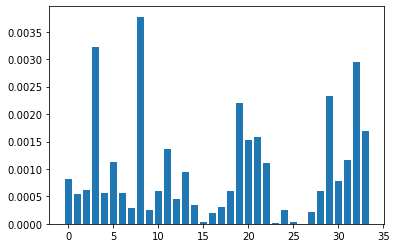

Attribute pat_geslacht_code has RMSE feature importance difference 0.014840929834192215
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008036310313041138
Attribute subloc_0 has RMSE feature importance difference 0.00010894727214496703
Attribute subloc_2 has RMSE feature importance difference 1.2883775610243093e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013026322145520473
Attribute subloc_4 has RMSE feature importance difference 0.0015339068016141945
Attribute subloc_5 has RMSE feature importance difference 0.0008626653264507187
Attribute subloc_6 has RMSE feature importance difference 0.000280957217865825
Attribute subloc_7 has RMSE feature importance difference 0.004624700688723557
Attribute subloc_8 has RMSE feature importance difference 0.00031790982523708695
Attribute subloc_9 has RMSE feature importance difference 0.0024849800623338893
Attribute stage_1 has RMSE feature importance difference 0.6849181644208356
Attribute stage_

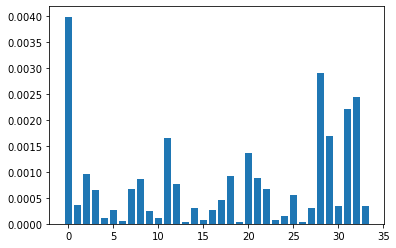

Attribute pat_geslacht_code has RMSE feature importance difference 0.014078500342390571
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008068373370814516
Attribute subloc_0 has RMSE feature importance difference 0.0001016249540041484
Attribute subloc_2 has RMSE feature importance difference 3.8022293183846005e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013347101152427472
Attribute subloc_4 has RMSE feature importance difference 0.0016027903674300334
Attribute subloc_5 has RMSE feature importance difference 0.0008935797797163855
Attribute subloc_6 has RMSE feature importance difference 0.0002683565148587244
Attribute subloc_7 has RMSE feature importance difference 0.005029504679041978
Attribute subloc_8 has RMSE feature importance difference 0.0003182906625705763
Attribute subloc_9 has RMSE feature importance difference 0.0025332710226131554
Attribute stage_1 has RMSE feature importance difference 0.6844496366902895
Attribute stage_2

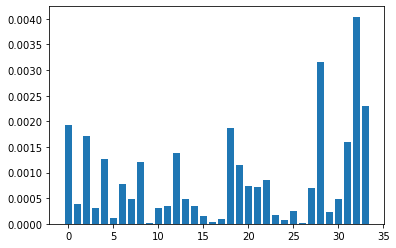

Attribute pat_geslacht_code has RMSE feature importance difference 0.014569492599294031
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008061381773641168
Attribute subloc_0 has RMSE feature importance difference 8.696892647556869e-05
Attribute subloc_2 has RMSE feature importance difference 4.245440663175324e-05
Attribute subloc_3 has RMSE feature importance difference 0.0012527708399376924
Attribute subloc_4 has RMSE feature importance difference 0.001613505035362079
Attribute subloc_5 has RMSE feature importance difference 0.0008501142863718773
Attribute subloc_6 has RMSE feature importance difference 0.00027433031018174854
Attribute subloc_7 has RMSE feature importance difference 0.004981663123437899
Attribute subloc_8 has RMSE feature importance difference 0.00032646723177099464
Attribute subloc_9 has RMSE feature importance difference 0.0025128222622755646
Attribute stage_1 has RMSE feature importance difference 0.6865861711691756
Attribute stage_2

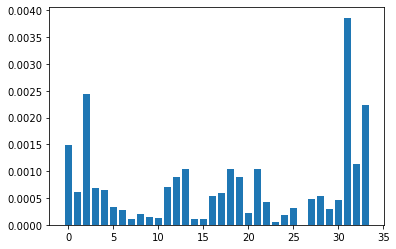

Attribute pat_geslacht_code has RMSE feature importance difference 0.014675480251986265
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008021597628675867
Attribute subloc_0 has RMSE feature importance difference 7.389798480285846e-05
Attribute subloc_2 has RMSE feature importance difference 3.766228906393042e-05
Attribute subloc_3 has RMSE feature importance difference 0.0012964327191879693
Attribute subloc_4 has RMSE feature importance difference 0.0015966242249327088
Attribute subloc_5 has RMSE feature importance difference 0.000879752854489238
Attribute subloc_6 has RMSE feature importance difference 0.0002871146792621699
Attribute subloc_7 has RMSE feature importance difference 0.005124257945728752
Attribute subloc_8 has RMSE feature importance difference 0.00032149578938138283
Attribute subloc_9 has RMSE feature importance difference 0.002531908299740567
Attribute stage_1 has RMSE feature importance difference 0.6859991944823194
Attribute stage_2 h

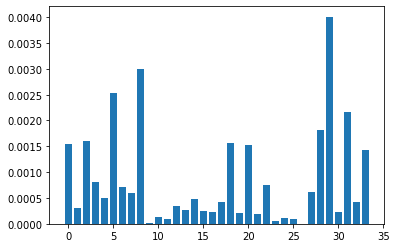

Attribute pat_geslacht_code has RMSE feature importance difference 0.014664995929985901
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008076110914067493
Attribute subloc_0 has RMSE feature importance difference 8.916426119786283e-05
Attribute subloc_2 has RMSE feature importance difference 3.615802430411293e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013064772086356907
Attribute subloc_4 has RMSE feature importance difference 0.0014256171631017935
Attribute subloc_5 has RMSE feature importance difference 0.0008539008044546378
Attribute subloc_6 has RMSE feature importance difference 0.000270780640625091
Attribute subloc_7 has RMSE feature importance difference 0.004730870516743825
Attribute subloc_8 has RMSE feature importance difference 0.0003265034690083914
Attribute subloc_9 has RMSE feature importance difference 0.00253077663124603
Attribute stage_1 has RMSE feature importance difference 0.6870065328473877
Attribute stage_2 has

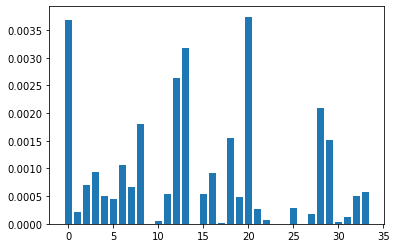

Attribute pat_geslacht_code has RMSE feature importance difference 0.014148378417100219
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008094610538754453
Attribute subloc_0 has RMSE feature importance difference 0.00010718865733617291
Attribute subloc_2 has RMSE feature importance difference 3.464853826658986e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013072697358170113
Attribute subloc_4 has RMSE feature importance difference 0.0015872414563064348
Attribute subloc_5 has RMSE feature importance difference 0.0008334904733758385
Attribute subloc_6 has RMSE feature importance difference 0.0002685388692781901
Attribute subloc_7 has RMSE feature importance difference 0.004897124073224622
Attribute subloc_8 has RMSE feature importance difference 0.00032682206053487084
Attribute subloc_9 has RMSE feature importance difference 0.0025395792254824484
Attribute stage_1 has RMSE feature importance difference 0.6862718427248075
Attribute stage_

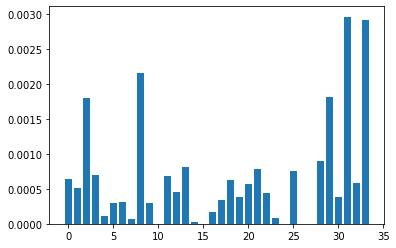

Attribute pat_geslacht_code has RMSE feature importance difference 0.014882735052946459
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008039463925399472
Attribute subloc_0 has RMSE feature importance difference 8.559530774500963e-05
Attribute subloc_2 has RMSE feature importance difference 3.7439227145816674e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013355297547138938
Attribute subloc_4 has RMSE feature importance difference 0.001600113771019895
Attribute subloc_5 has RMSE feature importance difference 0.0008780211490434965
Attribute subloc_6 has RMSE feature importance difference 0.00028801308349309026
Attribute subloc_7 has RMSE feature importance difference 0.004846843414355201
Attribute subloc_8 has RMSE feature importance difference 0.000316172211332133
Attribute subloc_9 has RMSE feature importance difference 0.0025445543875841506
Attribute stage_1 has RMSE feature importance difference 0.6860344355906556
Attribute stage_2 

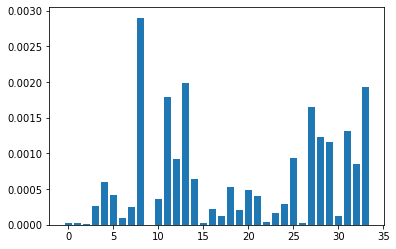

Attribute pat_geslacht_code has RMSE feature importance difference 0.015032807137321823
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008128110892960684
Attribute subloc_0 has RMSE feature importance difference 0.00012169600604436791
Attribute subloc_2 has RMSE feature importance difference 4.293380090287161e-05
Attribute subloc_3 has RMSE feature importance difference 0.001299703477075016
Attribute subloc_4 has RMSE feature importance difference 0.0015901686113302673
Attribute subloc_5 has RMSE feature importance difference 0.0008910655644667662
Attribute subloc_6 has RMSE feature importance difference 0.0002822914418213314
Attribute subloc_7 has RMSE feature importance difference 0.004744315032337389
Attribute subloc_8 has RMSE feature importance difference 0.00032696070128041774
Attribute subloc_9 has RMSE feature importance difference 0.0025079489491979965
Attribute stage_1 has RMSE feature importance difference 0.6842180561765957
Attribute stage_2

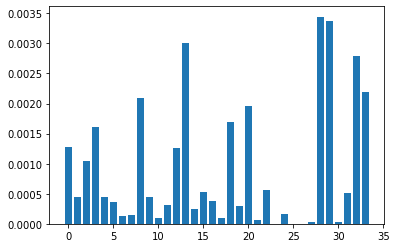

Attribute pat_geslacht_code has RMSE feature importance difference 0.014726458381031711
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008051351883560754
Attribute subloc_0 has RMSE feature importance difference 0.0001000814452998377
Attribute subloc_2 has RMSE feature importance difference 2.721549207546902e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013111148264589659
Attribute subloc_4 has RMSE feature importance difference 0.0015943852512859463
Attribute subloc_5 has RMSE feature importance difference 0.0008891204561433597
Attribute subloc_6 has RMSE feature importance difference 0.00028532794957776103
Attribute subloc_7 has RMSE feature importance difference 0.004855878086589198
Attribute subloc_8 has RMSE feature importance difference 0.00031083759071058646
Attribute subloc_9 has RMSE feature importance difference 0.0025355358824664894
Attribute stage_1 has RMSE feature importance difference 0.68664872180849
Attribute stage_2 

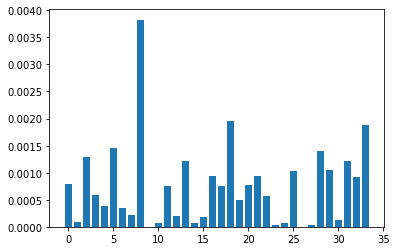

Attribute pat_geslacht_code has RMSE feature importance difference 0.014848075698747375
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008115647145130927
Attribute subloc_0 has RMSE feature importance difference 9.531988571419312e-05
Attribute subloc_2 has RMSE feature importance difference 3.880475572456434e-05
Attribute subloc_3 has RMSE feature importance difference 0.001315785493926007
Attribute subloc_4 has RMSE feature importance difference 0.0015077851360819283
Attribute subloc_5 has RMSE feature importance difference 0.0008759056853819039
Attribute subloc_6 has RMSE feature importance difference 0.0002829742472277315
Attribute subloc_7 has RMSE feature importance difference 0.004617744365777287
Attribute subloc_8 has RMSE feature importance difference 0.0003269520105607434
Attribute subloc_9 has RMSE feature importance difference 0.0025380911070922133
Attribute stage_1 has RMSE feature importance difference 0.6859262906054359
Attribute stage_2 h

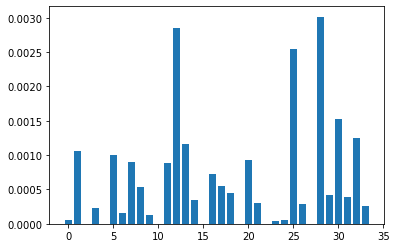

Attribute pat_geslacht_code has RMSE feature importance difference 0.015026735240228241
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0079413625312223
Attribute subloc_0 has RMSE feature importance difference 0.00012200378271195732
Attribute subloc_2 has RMSE feature importance difference 4.34874036723704e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013434503094772706
Attribute subloc_4 has RMSE feature importance difference 0.0015431501788886026
Attribute subloc_5 has RMSE feature importance difference 0.0008866392932350432
Attribute subloc_6 has RMSE feature importance difference 0.0002608491593963014
Attribute subloc_7 has RMSE feature importance difference 0.005076752619669595
Attribute subloc_8 has RMSE feature importance difference 0.00032248206204151756
Attribute subloc_9 has RMSE feature importance difference 0.0025445543875841506
Attribute stage_1 has RMSE feature importance difference 0.6857026760012742
Attribute stage_2 h

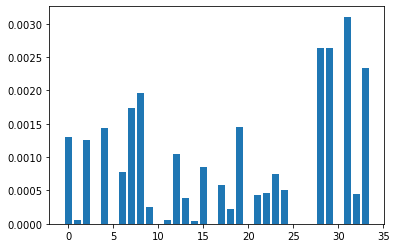

Attribute pat_geslacht_code has RMSE feature importance difference 0.014722495049676602
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00812269171401139
Attribute subloc_0 has RMSE feature importance difference 9.57879250175177e-05
Attribute subloc_2 has RMSE feature importance difference 4.651783263680611e-05
Attribute subloc_3 has RMSE feature importance difference 0.0012404458093758378
Attribute subloc_4 has RMSE feature importance difference 0.0016233989014379391
Attribute subloc_5 has RMSE feature importance difference 0.0008506276990785899
Attribute subloc_6 has RMSE feature importance difference 0.0002345733664609129
Attribute subloc_7 has RMSE feature importance difference 0.004874938741976932
Attribute subloc_8 has RMSE feature importance difference 0.00031788634062668183
Attribute subloc_9 has RMSE feature importance difference 0.0025445543875841506
Attribute stage_1 has RMSE feature importance difference 0.687086659428112
Attribute stage_2 ha

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

Only one class left in synthetic dataset, no Logistic Regression possible. Coefficients are set to 0
Attribute pat_geslacht_code has RMSE feature importance difference 0.015039374934941237
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008132441899503092
Attribute subloc_0 has RMSE feature importance difference 0.00012200378271195732
Attribute subloc_2 has RMSE feature importance difference 4.651783263680611e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013434503094772706
Attribute subloc_4 has RMSE feature importance difference 0.0016233989014379391
Attribute subloc_5 has RMSE feature importance difference 0.0008963986144593432
Attribute subloc_6 has RMSE feature importance difference 0.00029055881578958373
Attribute subloc_7 has RMSE feature importance difference 0.005152379101226087
Attribute subloc_8 has RMSE feature importance difference 0.00032696070128041774
Attribute subloc_9 has RMSE feature importance difference 0.0025445543

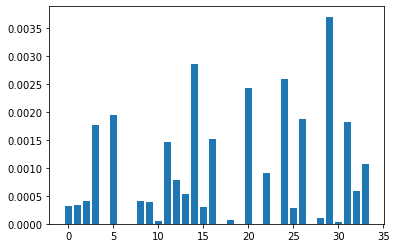

Attribute pat_geslacht_code has RMSE feature importance difference 0.014962421375366143
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008072278960997983
Attribute subloc_0 has RMSE feature importance difference 0.00011331588061742862
Attribute subloc_2 has RMSE feature importance difference 2.558377649899559e-05
Attribute subloc_3 has RMSE feature importance difference 0.0013434503094772706
Attribute subloc_4 has RMSE feature importance difference 0.0014701385488244244
Attribute subloc_5 has RMSE feature importance difference 0.0008963986144593432
Attribute subloc_6 has RMSE feature importance difference 0.00029055881578958373
Attribute subloc_7 has RMSE feature importance difference 0.00509449238947774
Attribute subloc_8 has RMSE feature importance difference 0.0003132445527191142
Attribute subloc_9 has RMSE feature importance difference 0.0025392206588739107
Attribute stage_1 has RMSE feature importance difference 0.6847666790927405
Attribute stage_2

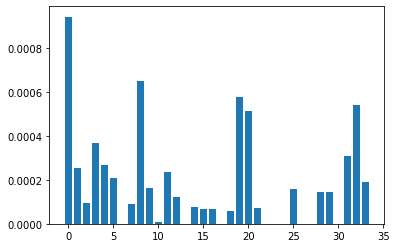

Attribute pat_geslacht_code has RMSE feature importance difference 0.014808764009819626
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008086891258083033
Attribute subloc_0 has RMSE feature importance difference 0.00011993987759793888
Attribute subloc_2 has RMSE feature importance difference 4.1633832374085896e-05
Attribute subloc_3 has RMSE feature importance difference 0.001323956987312346
Attribute subloc_4 has RMSE feature importance difference 0.0016067376321564682
Attribute subloc_5 has RMSE feature importance difference 0.0008963986144593432
Attribute subloc_6 has RMSE feature importance difference 0.00028752100321832605
Attribute subloc_7 has RMSE feature importance difference 0.00505960476987147
Attribute subloc_8 has RMSE feature importance difference 0.0003211154879829236
Attribute subloc_9 has RMSE feature importance difference 0.0025436588056384018
Attribute stage_1 has RMSE feature importance difference 0.6867863193372008
Attribute stage_2

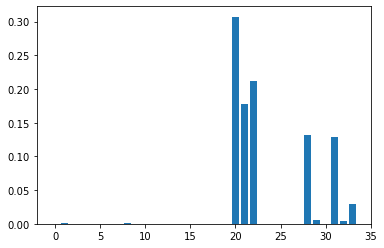

syn: DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=0.005)
Feature: pat_geslacht_code Score: 0.00000
Feature: tum_differentiatiegraad_code Score: 0.00000
Feature: subloc_0 Score: 0.00000
Feature: subloc_2 Score: 0.00000
Feature: subloc_3 Score: 0.00000
Feature: subloc_4 Score: 0.00000
Feature: subloc_5 Score: 0.00000
Feature: subloc_6 Score: 0.00000
Feature: subloc_7 Score: 0.00000
Feature: subloc_8 Score: 0.00000
Feature: subloc_9 Score: 0.00000
Feature: stage_1 Score: 0.00000
Feature: stage_2 Score: 0.00000
Feature: stage_2A Score: 0.00000
Feature: stage_2B Score: 0.00000
Feature: stage_2C Score: 0.00000
Feature: stage_3 Score: 0.00000
Feature: stage_3A Score: 1.00000
Feature: stage_3B Score: 0.00000
Feature: stage_3C Score: 0.00000
Feature: stage_4 Score: 0.00000
Feature: stage_4A Score: 0.00000
Feature: stage_4B Score: 0.00000
Feature: stage_4C Score: 0.00000
Feature: stage_M Score: 0.00000
Feature: stage_X Score: 0.00000
Feature: diagnosis_age_0-20 Score

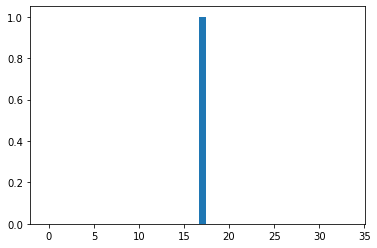

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

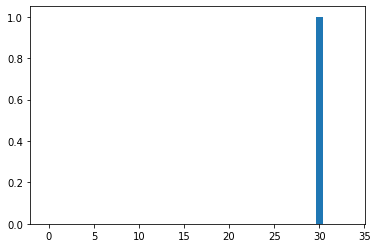

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

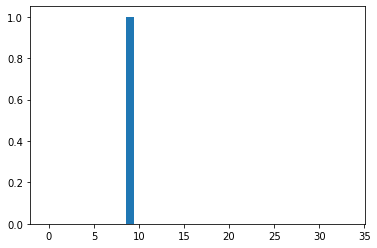

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 1.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

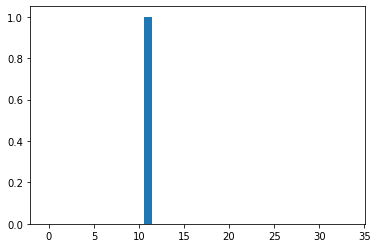

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 1.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

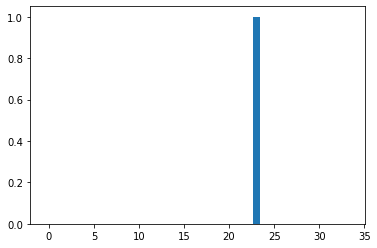

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

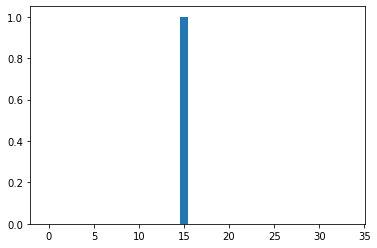

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

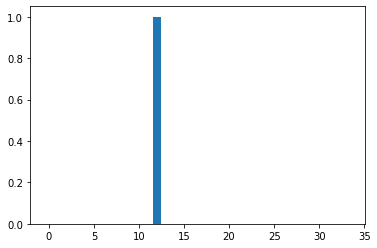

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 1.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

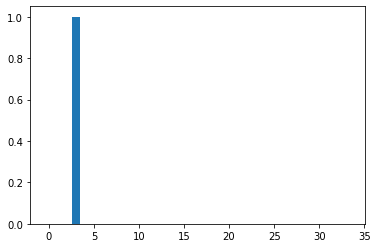

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 1.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

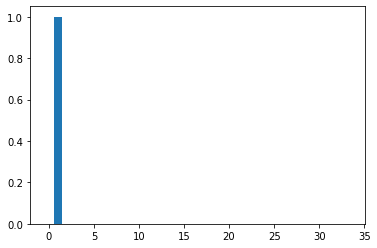

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.9981959652696472
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature i

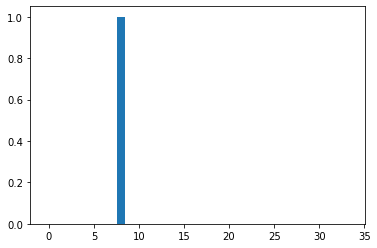

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.9981249962834433
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature 

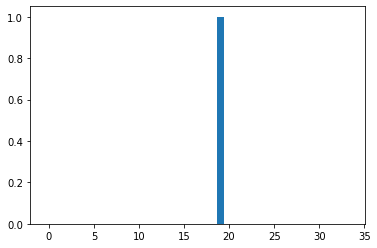

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

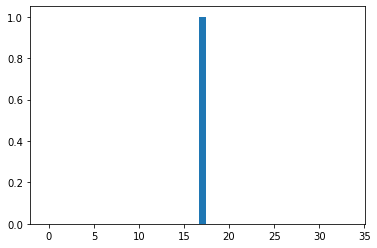

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

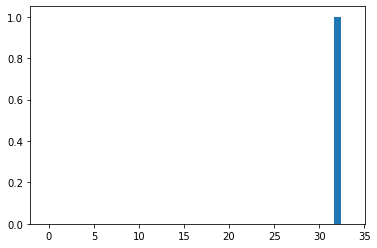

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

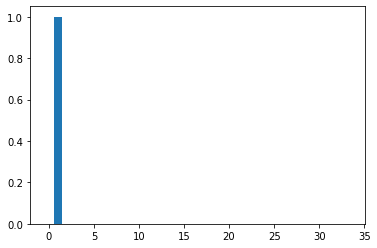

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.9981959652696472
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature i

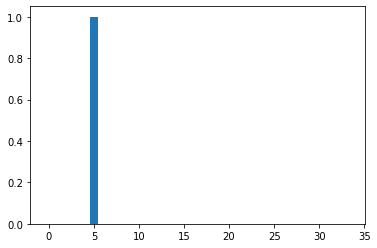

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 1.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

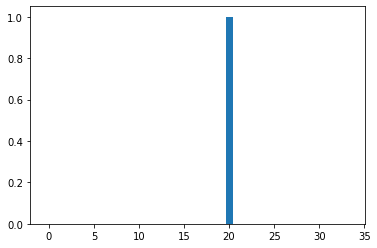

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

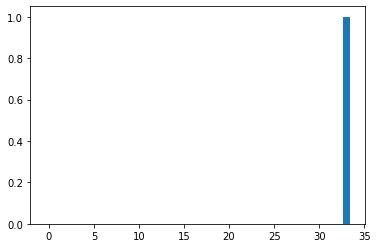

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

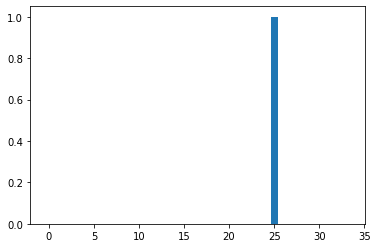

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

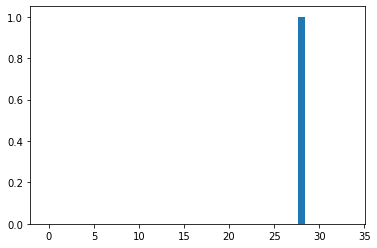

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

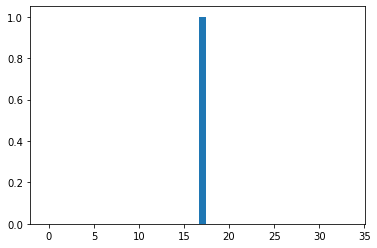

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

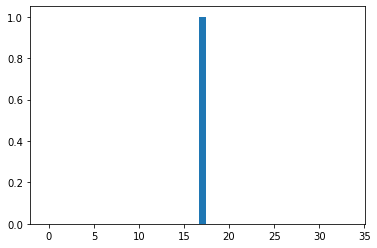

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

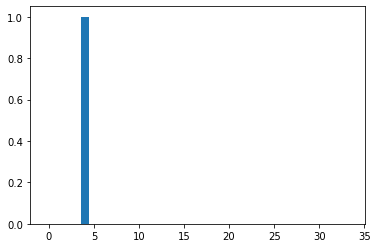

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 1.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

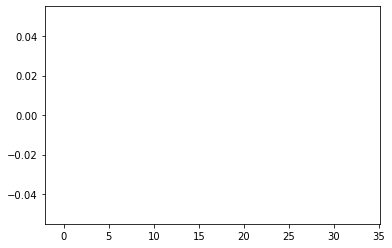

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

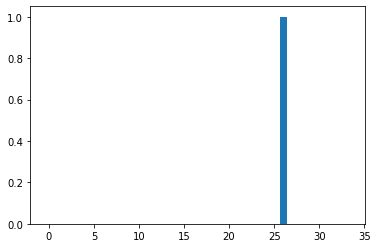

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

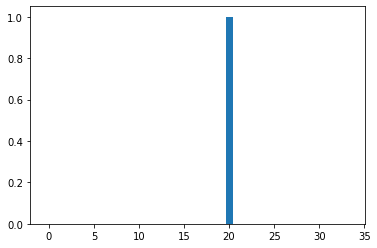

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

In [11]:
# Do for one DP algorithm at a time
privacy_levels = ms_privacy_levels

ms_FID_ORI, ms_FID, ms_FID_ERRORS = FIDmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
ori: LogisticRegression(C=10, max_iter=4000)
accuracy of original model is 0.7558280351195883
Feature: pat_geslacht_code Score: 0.12264
Feature: tum_differentiatiegraad_code Score: 0.09018
Feature: subloc_0 Score: 0.01105
Feature: subloc_2 Score: 0.00682
Feature: subloc_3 Score: 0.03665
Feature: subloc_4 Score: 0.04029
Feature: subloc_5 Score: 0.02994
Feature: subloc_6 Score: 0.01705
Feature: subloc_7 Score: 0.07178
Feature: subloc_8 Score: 0.01808
Feature: subloc_9 Score: 0.05044
Feature: stage_1 Score: 0.82896
Feature: stage_2 Score: 0.49425
Feature: stage_2A Score: 0.77217
Feature: stage_2B Score: 0.18763
Feature: stage_2C Score: 0.07368
Feature: stage_3 Score: 0.22181
Feature: stage_3A Score: 0.20600
Feature: stage_3B Score: 0.37506
Feature: stage_3C Score: 0.06133
Feature: stage_4 Score: 0.52766
Feature: stage_4A Score: 0.32193
Feature: stage_4B Score: 0.60583
Feat

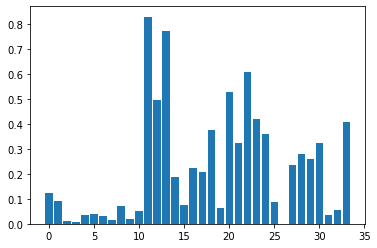

Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=0.1, max_iter=4000)
Feature: pat_geslacht_code Score: 0.08508
Feature: tum_differentiatiegraad_code Score: 0.03675
Feature: subloc_0 Score: 0.01775
Feature: subloc_2 Score: 0.00160
Feature: subloc_3 Score: 0.01734
Feature: subloc_4 Score: 0.02061
Feature: subloc_5 Score: 0.01046
Feature: subloc_6 Score: 0.00982
Feature: subloc_7 Score: 0.05460
Feature: subloc_8 Score: 0.01435
Feature: subloc_9 Score: 0.00217
Feature: stage_1 Score: 0.54669
Feature: stage_2 Score: 0.27555
Feature: stage_2A Score: 0.45816
Feature: stage_2B Score: 0.06326
Feature: stage_2C Score: 0.01579
Feature: stage_3 Score: 0.12116
Feature: stage_3A Score: 0.12925
Feature: stage_3B Score: 0.24993
Feature: stage_3C Score: 0.01651
Feature: stage_4 Score: 0.59533
Feature: stage_4A Score: 0.32710
Feature: stage_4B Score: 0.47625
Feature: stage_4C Score: 0.02647
Feature: stage_M Score: 0.13505
Feature: stage_X Score:

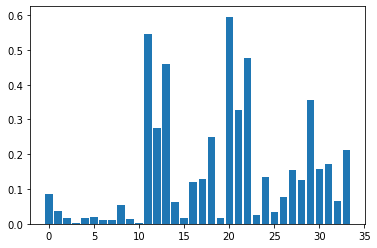

Attribute pat_geslacht_code has RMSE feature importance difference 0.0014101347091487791
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0028547514978467074
Attribute subloc_0 has RMSE feature importance difference 4.490870376407513e-05
Attribute subloc_2 has RMSE feature importance difference 2.7233908205996375e-05
Attribute subloc_3 has RMSE feature importance difference 0.000373111382102344
Attribute subloc_4 has RMSE feature importance difference 0.00038723208801393067
Attribute subloc_5 has RMSE feature importance difference 0.00037943939630273387
Attribute subloc_6 has RMSE feature importance difference 5.22355487504328e-05
Attribute subloc_7 has RMSE feature importance difference 0.0002951115870957162
Attribute subloc_8 has RMSE feature importance difference 1.395642165615457e-05
Attribute subloc_9 has RMSE feature importance difference 0.0023304157995878904
Attribute stage_1 has RMSE feature importance difference 0.07967882873009173
Attribute sta

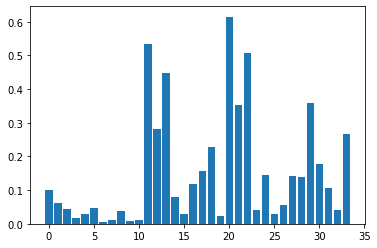

Attribute pat_geslacht_code has RMSE feature importance difference 0.0004961678332898436
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0008022262462367282
Attribute subloc_0 has RMSE feature importance difference 0.001076225538634369
Attribute subloc_2 has RMSE feature importance difference 0.00010114029768956566
Attribute subloc_3 has RMSE feature importance difference 7.41632272588244e-05
Attribute subloc_4 has RMSE feature importance difference 6.299680253018825e-05
Attribute subloc_5 has RMSE feature importance difference 0.0005467287116051817
Attribute subloc_6 has RMSE feature importance difference 3.894443649467757e-05
Attribute subloc_7 has RMSE feature importance difference 0.0011462272696618823
Attribute subloc_8 has RMSE feature importance difference 7.733826154159528e-05
Attribute subloc_9 has RMSE feature importance difference 0.0015329930442852786
Attribute stage_1 has RMSE feature importance difference 0.08711773095411446
Attribute stage

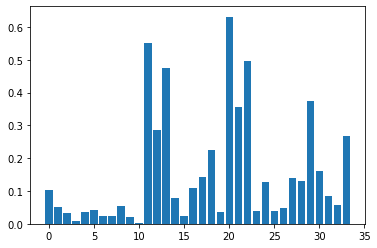

Attribute pat_geslacht_code has RMSE feature importance difference 0.00036379124168226966
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0016274129323875998
Attribute subloc_0 has RMSE feature importance difference 0.00044261822730725346
Attribute subloc_2 has RMSE feature importance difference 1.0420361310228596e-05
Attribute subloc_3 has RMSE feature importance difference 2.5876316775519475e-06
Attribute subloc_4 has RMSE feature importance difference 1.8329660891754572e-07
Attribute subloc_5 has RMSE feature importance difference 5.4628088192530786e-05
Attribute subloc_6 has RMSE feature importance difference 4.9048667590163775e-05
Attribute subloc_7 has RMSE feature importance difference 0.0002825748852518578
Attribute subloc_8 has RMSE feature importance difference 1.5710058458825986e-05
Attribute subloc_9 has RMSE feature importance difference 0.0022110432612264717
Attribute stage_1 has RMSE feature importance difference 0.07693682385612423
Attrib

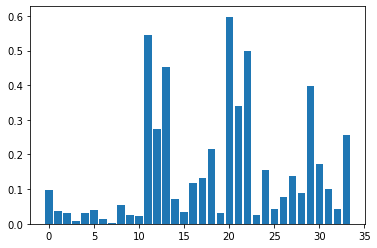

Attribute pat_geslacht_code has RMSE feature importance difference 0.000694691972762216
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0027135450544001688
Attribute subloc_0 has RMSE feature importance difference 0.000404121542720262
Attribute subloc_2 has RMSE feature importance difference 2.222361521230178e-06
Attribute subloc_3 has RMSE feature importance difference 2.4294896529658032e-05
Attribute subloc_4 has RMSE feature importance difference 8.272278829199271e-07
Attribute subloc_5 has RMSE feature importance difference 0.0002866316044671269
Attribute subloc_6 has RMSE feature importance difference 0.0002088950943401464
Attribute subloc_7 has RMSE feature importance difference 0.00035867752087406123
Attribute subloc_8 has RMSE feature importance difference 5.903944118933559e-05
Attribute subloc_9 has RMSE feature importance difference 0.0008295034115327074
Attribute stage_1 has RMSE feature importance difference 0.08038847836366016
Attribute stag

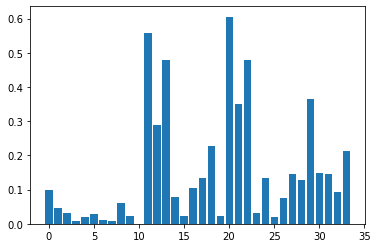

Attribute pat_geslacht_code has RMSE feature importance difference 0.0005864122453139571
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.001818925714164681
Attribute subloc_0 has RMSE feature importance difference 0.0004268234519751213
Attribute subloc_2 has RMSE feature importance difference 1.546294099214e-08
Attribute subloc_3 has RMSE feature importance difference 0.0002912252620929839
Attribute subloc_4 has RMSE feature importance difference 0.0001498215582953774
Attribute subloc_5 has RMSE feature importance difference 0.00039633253936734565
Attribute subloc_6 has RMSE feature importance difference 7.717608706212518e-05
Attribute subloc_7 has RMSE feature importance difference 0.00012538065568733575
Attribute subloc_8 has RMSE feature importance difference 1.9823592667885448e-05
Attribute subloc_9 has RMSE feature importance difference 0.002475133601818131
Attribute stage_1 has RMSE feature importance difference 0.07382661739157932
Attribute stage_

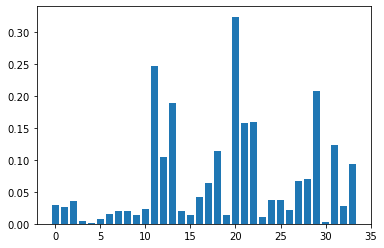

Attribute pat_geslacht_code has RMSE feature importance difference 0.00854635543236079
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.004069808812698558
Attribute subloc_0 has RMSE feature importance difference 0.0006460951285543201
Attribute subloc_2 has RMSE feature importance difference 5.986674745283573e-06
Attribute subloc_3 has RMSE feature importance difference 0.0012851764898797187
Attribute subloc_4 has RMSE feature importance difference 0.0010953146349055103
Attribute subloc_5 has RMSE feature importance difference 0.00020465109306457374
Attribute subloc_6 has RMSE feature importance difference 5.71963217158403e-06
Attribute subloc_7 has RMSE feature importance difference 0.0026545706485590977
Attribute subloc_8 has RMSE feature importance difference 2.0305727490067857e-05
Attribute subloc_9 has RMSE feature importance difference 0.0007176923625514432
Attribute stage_1 has RMSE feature importance difference 0.33902155197070716
Attribute stage_

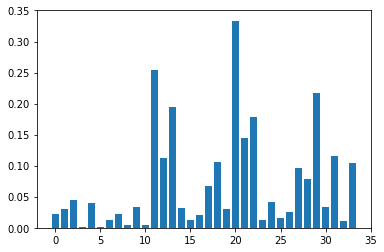

Attribute pat_geslacht_code has RMSE feature importance difference 0.010074526096611794
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0035067053885357276
Attribute subloc_0 has RMSE feature importance difference 0.001164643339646518
Attribute subloc_2 has RMSE feature importance difference 3.5520209390044676e-05
Attribute subloc_3 has RMSE feature importance difference 1.1030213709270938e-05
Attribute subloc_4 has RMSE feature importance difference 0.001581610096156619
Attribute subloc_5 has RMSE feature importance difference 0.00031326999152093906
Attribute subloc_6 has RMSE feature importance difference 3.557752775853812e-05
Attribute subloc_7 has RMSE feature importance difference 0.004540573204685231
Attribute subloc_8 has RMSE feature importance difference 0.0002205368539173889
Attribute subloc_9 has RMSE feature importance difference 0.0021094405690357146
Attribute stage_1 has RMSE feature importance difference 0.33106964625217883
Attribute stage

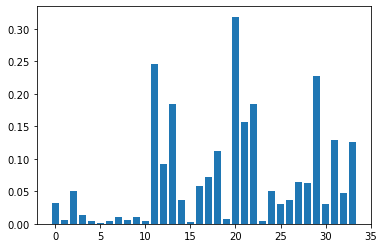

Attribute pat_geslacht_code has RMSE feature importance difference 0.008239815387674805
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007055221950029198
Attribute subloc_0 has RMSE feature importance difference 0.0014953521124983927
Attribute subloc_2 has RMSE feature importance difference 4.7398800740172366e-05
Attribute subloc_3 has RMSE feature importance difference 0.0010646357632960286
Attribute subloc_4 has RMSE feature importance difference 0.0014878742525968277
Attribute subloc_5 has RMSE feature importance difference 0.0006579443671334838
Attribute subloc_6 has RMSE feature importance difference 3.5904125161765196e-05
Attribute subloc_7 has RMSE feature importance difference 0.004254386305190097
Attribute subloc_8 has RMSE feature importance difference 6.688732708940334e-05
Attribute subloc_9 has RMSE feature importance difference 0.0021610811143965816
Attribute stage_1 has RMSE feature importance difference 0.3403955992359584
Attribute stage_

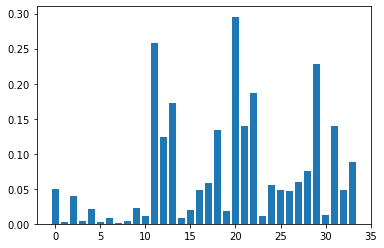

Attribute pat_geslacht_code has RMSE feature importance difference 0.005237480486005477
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007564053960567346
Attribute subloc_0 has RMSE feature importance difference 0.0008082891907516794
Attribute subloc_2 has RMSE feature importance difference 6.392821802304577e-06
Attribute subloc_3 has RMSE feature importance difference 0.0002584655162906685
Attribute subloc_4 has RMSE feature importance difference 0.0013768276921554492
Attribute subloc_5 has RMSE feature importance difference 0.0004407764898529972
Attribute subloc_6 has RMSE feature importance difference 0.0002335304456386615
Attribute subloc_7 has RMSE feature importance difference 0.004621268841252029
Attribute subloc_8 has RMSE feature importance difference 1.8077780465319332e-05
Attribute subloc_9 has RMSE feature importance difference 0.0014981340057599473
Attribute stage_1 has RMSE feature importance difference 0.3264099874576638
Attribute stage_2

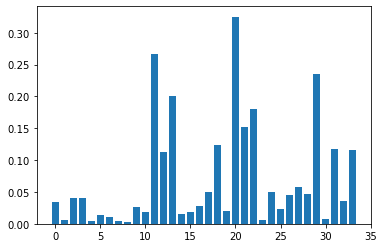

Attribute pat_geslacht_code has RMSE feature importance difference 0.007777258695902436
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007151864028531145
Attribute subloc_0 has RMSE feature importance difference 0.0008797613234445736
Attribute subloc_2 has RMSE feature importance difference 0.0011853029287767867
Attribute subloc_3 has RMSE feature importance difference 0.0009992205262776296
Attribute subloc_4 has RMSE feature importance difference 0.0006836368513102231
Attribute subloc_5 has RMSE feature importance difference 0.00039675959587169454
Attribute subloc_6 has RMSE feature importance difference 0.0001783573173324722
Attribute subloc_7 has RMSE feature importance difference 0.004775025472846787
Attribute subloc_8 has RMSE feature importance difference 6.071232046158999e-05
Attribute subloc_9 has RMSE feature importance difference 0.0009714663204151635
Attribute stage_1 has RMSE feature importance difference 0.3159436365915251
Attribute stage_2

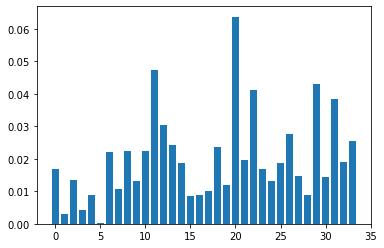

Attribute pat_geslacht_code has RMSE feature importance difference 0.011189724574644915
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007605989193956041
Attribute subloc_0 has RMSE feature importance difference 5.971098100662937e-06
Attribute subloc_2 has RMSE feature importance difference 7.338469779657885e-06
Attribute subloc_3 has RMSE feature importance difference 0.0007796904115626142
Attribute subloc_4 has RMSE feature importance difference 0.0016021749709764729
Attribute subloc_5 has RMSE feature importance difference 6.0723325049096425e-05
Attribute subloc_6 has RMSE feature importance difference 4.161613882222897e-05
Attribute subloc_7 has RMSE feature importance difference 0.002435563075542095
Attribute subloc_8 has RMSE feature importance difference 2.3992276878916407e-05
Attribute subloc_9 has RMSE feature importance difference 0.0007825219589771878
Attribute stage_1 has RMSE feature importance difference 0.6108711364870334
Attribute stage_

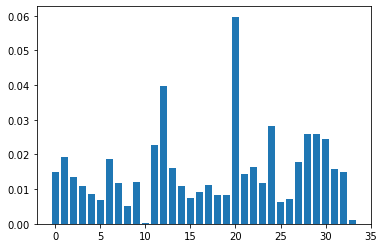

Attribute pat_geslacht_code has RMSE feature importance difference 0.011584978833363863
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.005016302678737499
Attribute subloc_0 has RMSE feature importance difference 5.628830870707098e-06
Attribute subloc_2 has RMSE feature importance difference 1.698865511559089e-05
Attribute subloc_3 has RMSE feature importance difference 0.0007792594843676267
Attribute subloc_4 has RMSE feature importance difference 0.00111911498569566
Attribute subloc_5 has RMSE feature importance difference 0.00012878269510156905
Attribute subloc_6 has RMSE feature importance difference 2.6773665926381257e-05
Attribute subloc_7 has RMSE feature importance difference 0.00443735330406107
Attribute subloc_8 has RMSE feature importance difference 3.522328769728931e-05
Attribute subloc_9 has RMSE feature importance difference 0.002529223054026775
Attribute stage_1 has RMSE feature importance difference 0.6499542355548772
Attribute stage_2 ha

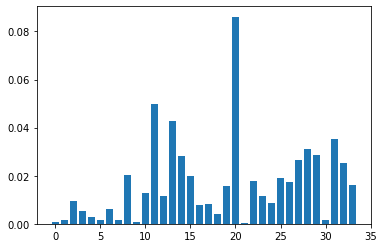

Attribute pat_geslacht_code has RMSE feature importance difference 0.01483835312787291
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007863283718286863
Attribute subloc_0 has RMSE feature importance difference 2.5917489932146405e-06
Attribute subloc_2 has RMSE feature importance difference 2.4795246023525057e-06
Attribute subloc_3 has RMSE feature importance difference 0.0011535616501004429
Attribute subloc_4 has RMSE feature importance difference 0.0015097193786044471
Attribute subloc_5 has RMSE feature importance difference 0.0005575171985830844
Attribute subloc_6 has RMSE feature importance difference 0.00024139698708638654
Attribute subloc_7 has RMSE feature importance difference 0.0026594354123053395
Attribute subloc_8 has RMSE feature importance difference 0.00030617278320260277
Attribute subloc_9 has RMSE feature importance difference 0.00143170486520657
Attribute stage_1 has RMSE feature importance difference 0.6071103423776305
Attribute stage_

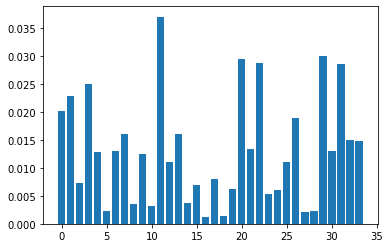

Attribute pat_geslacht_code has RMSE feature importance difference 0.010502594280008848
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00455059811289654
Attribute subloc_0 has RMSE feature importance difference 1.4062832609310658e-05
Attribute subloc_2 has RMSE feature importance difference 0.00033196324353734514
Attribute subloc_3 has RMSE feature importance difference 0.00056957381571995
Attribute subloc_4 has RMSE feature importance difference 0.001446404828870891
Attribute subloc_5 has RMSE feature importance difference 0.00028944975608669054
Attribute subloc_6 has RMSE feature importance difference 9.604761796167313e-07
Attribute subloc_7 has RMSE feature importance difference 0.0046615524330542845
Attribute subloc_8 has RMSE feature importance difference 3.131204909662497e-05
Attribute subloc_9 has RMSE feature importance difference 0.0022305136658768154
Attribute stage_1 has RMSE feature importance difference 0.6272636566122841
Attribute stage_2 

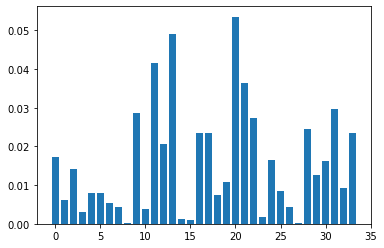

Attribute pat_geslacht_code has RMSE feature importance difference 0.011115556725959649
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007047045671172032
Attribute subloc_0 has RMSE feature importance difference 1.023450328428513e-05
Attribute subloc_2 has RMSE feature importance difference 1.4797158620711857e-05
Attribute subloc_3 has RMSE feature importance difference 0.000820697060424076
Attribute subloc_4 has RMSE feature importance difference 0.0010472562721817612
Attribute subloc_5 has RMSE feature importance difference 0.0005985665632012875
Attribute subloc_6 has RMSE feature importance difference 0.00015909791943956477
Attribute subloc_7 has RMSE feature importance difference 0.005126604444831569
Attribute subloc_8 has RMSE feature importance difference 0.00011196822256977778
Attribute subloc_9 has RMSE feature importance difference 0.0021636202467957204
Attribute stage_1 has RMSE feature importance difference 0.6199575575056582
Attribute stage_

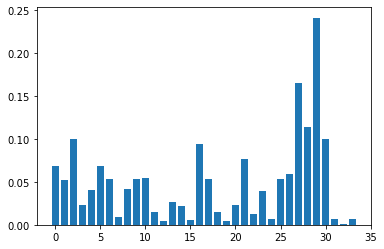

Attribute pat_geslacht_code has RMSE feature importance difference 0.0029172629151519892
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0014842106442387178
Attribute subloc_0 has RMSE feature importance difference 0.007899251588490197
Attribute subloc_2 has RMSE feature importance difference 0.00025714273116872927
Attribute subloc_3 has RMSE feature importance difference 1.349816343031033e-05
Attribute subloc_4 has RMSE feature importance difference 0.0008263629026635682
Attribute subloc_5 has RMSE feature importance difference 0.0005386952629109977
Attribute subloc_6 has RMSE feature importance difference 7.200534343239237e-05
Attribute subloc_7 has RMSE feature importance difference 0.0009261983768365111
Attribute subloc_8 has RMSE feature importance difference 0.0012394367779351284
Attribute subloc_9 has RMSE feature importance difference 1.3022747542340744e-05
Attribute stage_1 has RMSE feature importance difference 0.6621670628804235
Attribute stag

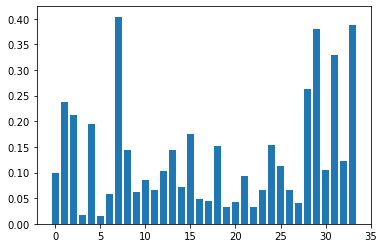

Attribute pat_geslacht_code has RMSE feature importance difference 0.0005785401628755285
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.021454246736241224
Attribute subloc_0 has RMSE feature importance difference 0.04080474460877487
Attribute subloc_2 has RMSE feature importance difference 0.00011426721598137273
Attribute subloc_3 has RMSE feature importance difference 0.02487703101427748
Attribute subloc_4 has RMSE feature importance difference 0.0005930676406183896
Attribute subloc_5 has RMSE feature importance difference 0.0007825056507762654
Attribute subloc_6 has RMSE feature importance difference 0.14965261879326835
Attribute subloc_7 has RMSE feature importance difference 0.005215175568240869
Attribute subloc_8 has RMSE feature importance difference 0.001958366843688774
Attribute subloc_9 has RMSE feature importance difference 0.0011784556873444879
Attribute stage_1 has RMSE feature importance difference 0.5830722477884854
Attribute stage_2 has R

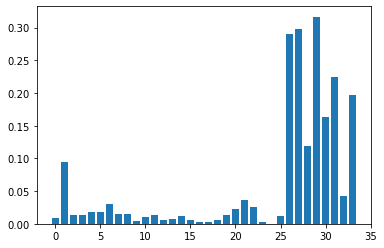

Attribute pat_geslacht_code has RMSE feature importance difference 0.013101656589613854
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 1.8405642702686306e-05
Attribute subloc_0 has RMSE feature importance difference 7.939001792915512e-06
Attribute subloc_2 has RMSE feature importance difference 4.399295069186e-05
Attribute subloc_3 has RMSE feature importance difference 0.00032606117145107225
Attribute subloc_4 has RMSE feature importance difference 0.0004777644830858115
Attribute subloc_5 has RMSE feature importance difference 1.4574220355580487e-07
Attribute subloc_6 has RMSE feature importance difference 3.876858869983054e-06
Attribute subloc_7 has RMSE feature importance difference 0.0031989174877340163
Attribute subloc_8 has RMSE feature importance difference 0.00019902939806350564
Attribute subloc_9 has RMSE feature importance difference 0.0016063761127841987
Attribute stage_1 has RMSE feature importance difference 0.6649456503715838
Attribute stage

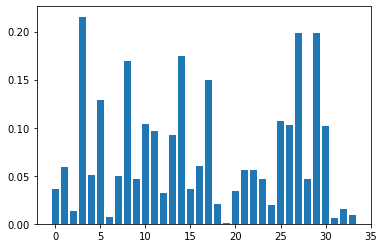

Attribute pat_geslacht_code has RMSE feature importance difference 0.007425597604418673
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0009459739139673377
Attribute subloc_0 has RMSE feature importance difference 4.958727974317996e-06
Attribute subloc_2 has RMSE feature importance difference 0.04350953435559973
Attribute subloc_3 has RMSE feature importance difference 0.00021065444251968984
Attribute subloc_4 has RMSE feature importance difference 0.00773823772710975
Attribute subloc_5 has RMSE feature importance difference 0.0005274279545692351
Attribute subloc_6 has RMSE feature importance difference 0.0010468370578435976
Attribute subloc_7 has RMSE feature importance difference 0.00942829506545898
Attribute subloc_8 has RMSE feature importance difference 0.0008149056548409188
Attribute subloc_9 has RMSE feature importance difference 0.0028598835818165174
Attribute stage_1 has RMSE feature importance difference 0.5366142362265655
Attribute stage_2 has

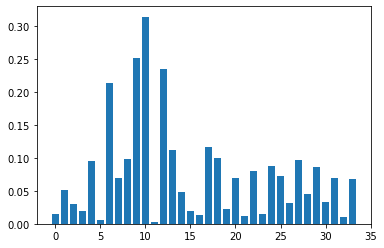

Attribute pat_geslacht_code has RMSE feature importance difference 0.011600519385513305
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0014657280914109924
Attribute subloc_0 has RMSE feature importance difference 0.00036267181200280127
Attribute subloc_2 has RMSE feature importance difference 0.00015707552964627842
Attribute subloc_3 has RMSE feature importance difference 0.0034989135899177776
Attribute subloc_4 has RMSE feature importance difference 0.001225709270535621
Attribute subloc_5 has RMSE feature importance difference 0.03401517649433262
Attribute subloc_6 has RMSE feature importance difference 0.002837225822825462
Attribute subloc_7 has RMSE feature importance difference 0.0007201516290704997
Attribute subloc_8 has RMSE feature importance difference 0.05462673112416407
Attribute subloc_9 has RMSE feature importance difference 0.0697850454619918
Attribute stage_1 has RMSE feature importance difference 0.682560859474711
Attribute stage_2 has RM

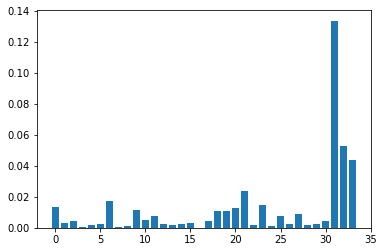

Attribute pat_geslacht_code has RMSE feature importance difference 0.011964776745547257
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007560654100704054
Attribute subloc_0 has RMSE feature importance difference 4.6462703611249115e-05
Attribute subloc_2 has RMSE feature importance difference 3.696887859309202e-05
Attribute subloc_3 has RMSE feature importance difference 0.0012062862598532695
Attribute subloc_4 has RMSE feature importance difference 0.0014377186797234884
Attribute subloc_5 has RMSE feature importance difference 0.00015512615878002163
Attribute subloc_6 has RMSE feature importance difference 0.0002679074846944836
Attribute subloc_7 has RMSE feature importance difference 0.004946704361238718
Attribute subloc_8 has RMSE feature importance difference 4.0095956828604746e-05
Attribute subloc_9 has RMSE feature importance difference 0.00207444820451576
Attribute stage_1 has RMSE feature importance difference 0.6743135591290234
Attribute stage_2

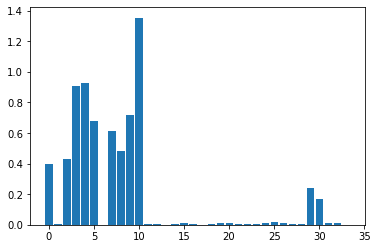

Attribute pat_geslacht_code has RMSE feature importance difference 0.0758769749208558
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007151514155352835
Attribute subloc_0 has RMSE feature importance difference 0.17433844896695674
Attribute subloc_2 has RMSE feature importance difference 0.8135343832355654
Attribute subloc_3 has RMSE feature importance difference 0.7954245804395578
Attribute subloc_4 has RMSE feature importance difference 0.4084255347183816
Attribute subloc_5 has RMSE feature importance difference 0.0008963986144593432
Attribute subloc_6 has RMSE feature importance difference 0.35633521027749215
Attribute subloc_7 has RMSE feature importance difference 0.16839349189751146
Attribute subloc_8 has RMSE feature importance difference 0.48658674230201504
Attribute subloc_9 has RMSE feature importance difference 1.6964752127608478
Attribute stage_1 has RMSE feature importance difference 0.6772695854615233
Attribute stage_2 has RMSE feature impo

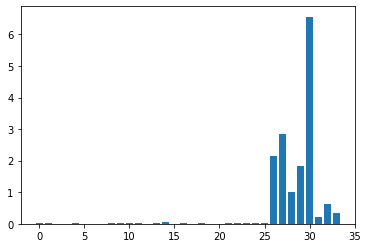

Attribute pat_geslacht_code has RMSE feature importance difference 0.0088706364490368
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0028248260675123272
Attribute subloc_0 has RMSE feature importance difference 3.410549027876758e-05
Attribute subloc_2 has RMSE feature importance difference 6.477806957893894e-07
Attribute subloc_3 has RMSE feature importance difference 0.0005422738164480804
Attribute subloc_4 has RMSE feature importance difference 0.0016233989014379391
Attribute subloc_5 has RMSE feature importance difference 0.0004763688150378351
Attribute subloc_6 has RMSE feature importance difference 0.00026536813043719223
Attribute subloc_7 has RMSE feature importance difference 0.00382570447621436
Attribute subloc_8 has RMSE feature importance difference 1.574846607483068e-05
Attribute subloc_9 has RMSE feature importance difference 0.00026418879019559185
Attribute stage_1 has RMSE feature importance difference 0.6448912559364471
Attribute stage_2 

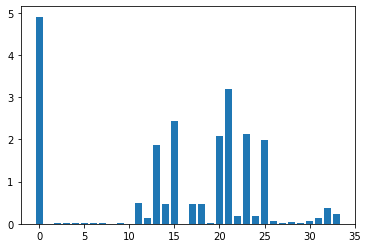

Attribute pat_geslacht_code has RMSE feature importance difference 22.883878811288593
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007160976351309829
Attribute subloc_0 has RMSE feature importance difference 4.227565341976044e-05
Attribute subloc_2 has RMSE feature importance difference 7.971273692241236e-05
Attribute subloc_3 has RMSE feature importance difference 0.0008713755386808964
Attribute subloc_4 has RMSE feature importance difference 0.0009460892628556516
Attribute subloc_5 has RMSE feature importance difference 0.0003437523143529374
Attribute subloc_6 has RMSE feature importance difference 9.318801937001894e-05
Attribute subloc_7 has RMSE feature importance difference 0.004265928315710996
Attribute subloc_8 has RMSE feature importance difference 2.4323519087351544e-05
Attribute subloc_9 has RMSE feature importance difference 0.0020016352787911055
Attribute stage_1 has RMSE feature importance difference 0.11324084130841906
Attribute stage_2 

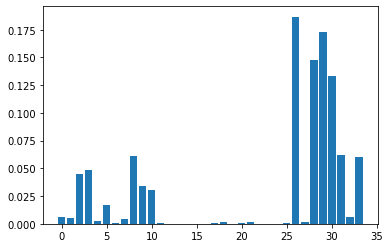

Attribute pat_geslacht_code has RMSE feature importance difference 0.013575406835196119
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007169188210811899
Attribute subloc_0 has RMSE feature importance difference 0.001171384352325206
Attribute subloc_2 has RMSE feature importance difference 0.0017544988315149515
Attribute subloc_3 has RMSE feature importance difference 0.001171162171765012
Attribute subloc_4 has RMSE feature importance difference 0.0005257847011451675
Attribute subloc_5 has RMSE feature importance difference 0.0008791454285486975
Attribute subloc_6 has RMSE feature importance difference 0.00015199851705707164
Attribute subloc_7 has RMSE feature importance difference 0.00010537243855254636
Attribute subloc_8 has RMSE feature importance difference 0.0002584016003561177
Attribute subloc_9 has RMSE feature importance difference 0.0003979760822258297
Attribute stage_1 has RMSE feature importance difference 0.685544194471062
Attribute stage_2 

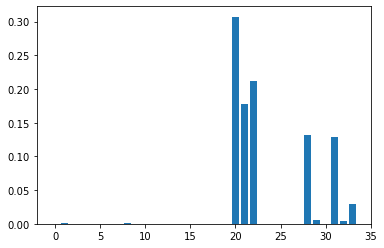

syn: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
Feature: pat_geslacht_code Score: 0.00041
Feature: tum_differentiatiegraad_code Score: 0.00042
Feature: subloc_0 Score: 0.00111
Feature: subloc_2 Score: 0.00000
Feature: subloc_3 Score: 0.00000
Feature: subloc_4 Score: 0.00000
Feature: subloc_5 Score: 0.00000
Feature: subloc_6 Score: 0.00000
Feature: subloc_7 Score: 0.00000
Feature: subloc_8 Score: 0.00000
Feature: subloc_9 Score: 0.00000
Feature: stage_1 Score: 0.00000
Feature: stage_2 Score: 0.00000
Feature: stage_2A Score: 0.00000
Feature: stage_2B Score: 0.00000
Feature: stage_2C Score: 0.00000
Feature: stage_3 Score: 0.00000
Feature: stage_3A Score: 0.00000
Feature: stage_3B Score: 0.00000
Feature: stage_3C Score: 0.00000
Feature: stage_4 Score: 0.31903
Feature: stage_4A Score: 0.16292
Feature: stage_4B Score: 0.19194
Feature: stage_4C Score: 0.00000
Feature: stage_M Score: 0.00000
Feature: stage_X Score: 0.00000
Feature: diagnosis_age_0-20 Score

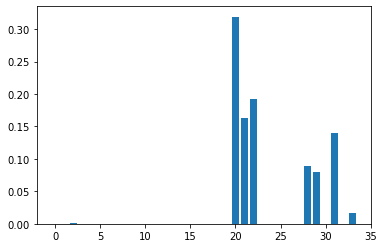

Attribute pat_geslacht_code has RMSE feature importance difference 4.526793854880677e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 2.3126913888645815e-07
Attribute subloc_0 has RMSE feature importance difference 1.1479013400660544e-06
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

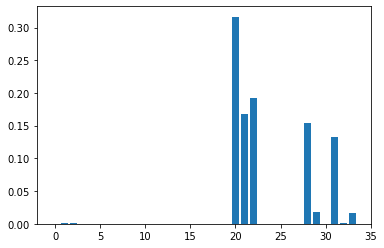

Attribute pat_geslacht_code has RMSE feature importance difference 2.5767808314696938e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 1.5850877663594642e-07
Attribute subloc_0 has RMSE feature importance difference 1.2233380587797802e-06
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 7.967113734027962e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE fe

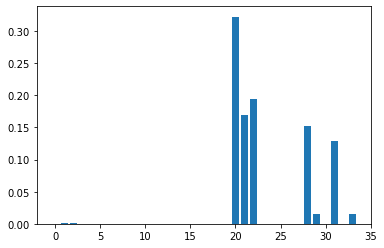

Attribute pat_geslacht_code has RMSE feature importance difference 2.9744112572138976e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 2.7726531903324725e-08
Attribute subloc_0 has RMSE feature importance difference 3.172306090788611e-06
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 4.729266890748631e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE fea

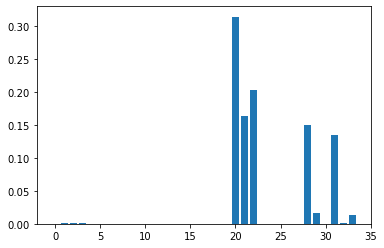

Attribute pat_geslacht_code has RMSE feature importance difference 1.7646650399277622e-10
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 1.3715933534462437e-07
Attribute subloc_0 has RMSE feature importance difference 8.571048237465891e-07
Attribute subloc_2 has RMSE feature importance difference 2.53520271001045e-07
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage

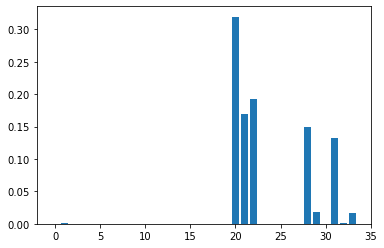

Attribute pat_geslacht_code has RMSE feature importance difference 5.432125357501911e-09
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.022850768451624e-08
Attribute subloc_0 has RMSE feature importance difference 1.4708850231276466e-07
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 2.3253306974909894e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE fea

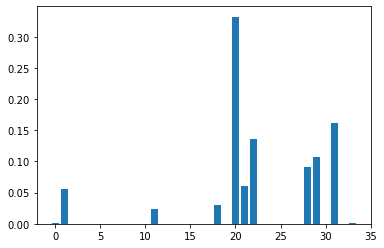

Attribute pat_geslacht_code has RMSE feature importance difference 3.886083990402672e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0030559012068444038
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0005683747667914508
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_

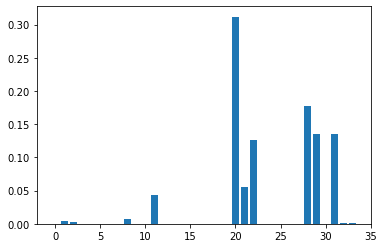

Attribute pat_geslacht_code has RMSE feature importance difference 2.9659462434657233e-09
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 1.2355552936429653e-05
Attribute subloc_0 has RMSE feature importance difference 5.8210349450060595e-06
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 3.31383820760964e-05
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.001840844201230961
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stag

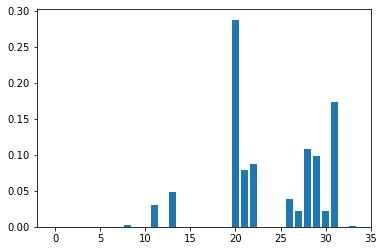

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.0521003311779505e-06
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0008981457542429761
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0023498820146766

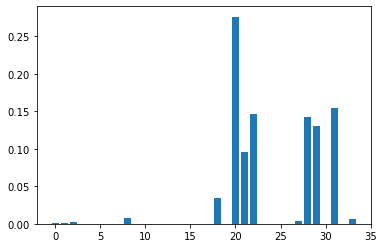

Attribute pat_geslacht_code has RMSE feature importance difference 9.42787824793029e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 7.250210995968557e-09
Attribute subloc_0 has RMSE feature importance difference 3.6157071953785084e-06
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 4.3434219160731654e-05
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

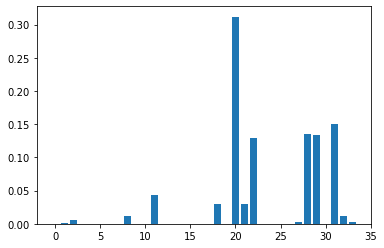

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 7.225145533373654e-08
Attribute subloc_0 has RMSE feature importance difference 3.443191845706712e-05
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.00011430916801420081
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0018575493548873235
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stag

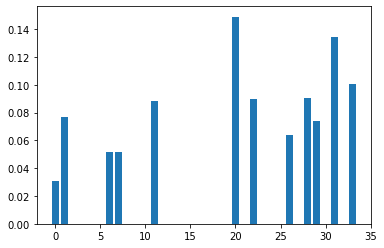

Attribute pat_geslacht_code has RMSE feature importance difference 0.0009465265240561495
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.005708882681110671
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.002663876720728831
Attribute subloc_6 has RMSE feature importance difference 0.0026799882703229293
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.007751598223090106
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importanc

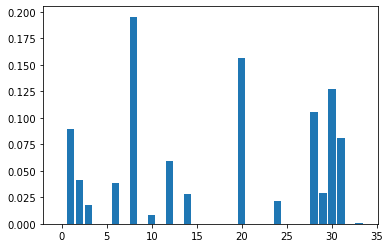

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007923819204525428
Attribute subloc_0 has RMSE feature importance difference 0.0016672186388283652
Attribute subloc_2 has RMSE feature importance difference 0.00032900007704875336
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.001484080087574571
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.037828423188875054
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 6.372594240708864e-05
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0035362161167296915
Attribute stage_2A has RM

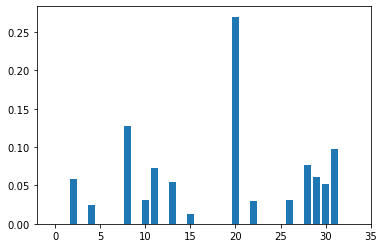

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 0.0034480446900850563
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0005734138310899389
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.016134154408740366
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0009925081135640419
Attribute stage_1 has RMSE feature importance difference 0.005340206578691869
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importa

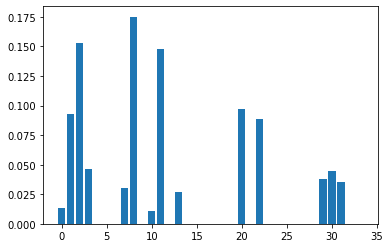

Attribute pat_geslacht_code has RMSE feature importance difference 0.00017130946396344066
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008518607702199978
Attribute subloc_0 has RMSE feature importance difference 0.02326921440464224
Attribute subloc_2 has RMSE feature importance difference 0.0021166815202258433
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.000935617916969664
Attribute subloc_7 has RMSE feature importance difference 0.030364128145308585
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0001188739453741485
Attribute stage_1 has RMSE feature importance difference 0.02189803798851207
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE f

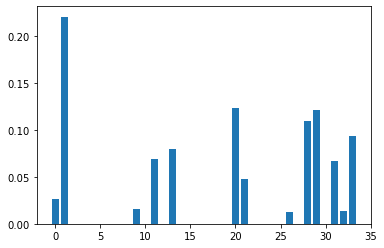

Attribute pat_geslacht_code has RMSE feature importance difference 0.0006726225815925003
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.04826110570715833
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.00024393608879899495
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.004813134552061273
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.00

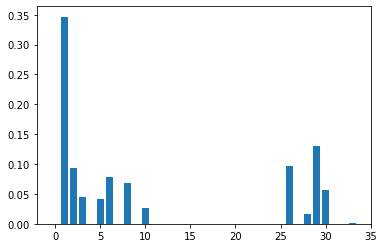

Attribute pat_geslacht_code has RMSE feature importance difference 3.692561467891131e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.11959073197961034
Attribute subloc_0 has RMSE feature importance difference 0.008602556072894223
Attribute subloc_2 has RMSE feature importance difference 0.001964861939589623
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.00173179814631013
Attribute subloc_5 has RMSE feature importance difference 0.006088362675720026
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.004541954380224486
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0007001776596037196
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE fea

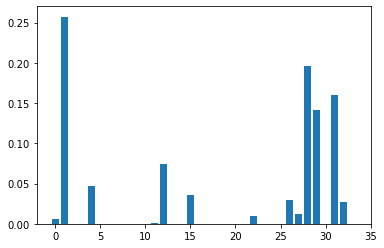

Attribute pat_geslacht_code has RMSE feature importance difference 4.030917821663496e-05
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.06576533434372456
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.002249203406018224
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 1.6747321386400235e-06
Attribute stage_2 has RMSE feature importance difference 0.005453127496368084
Attribute stage_2A has RMSE feature importanc

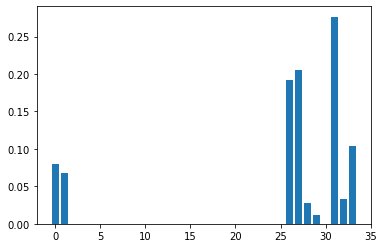

Attribute pat_geslacht_code has RMSE feature importance difference 0.006367293729358518
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.004556667906514346
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature 

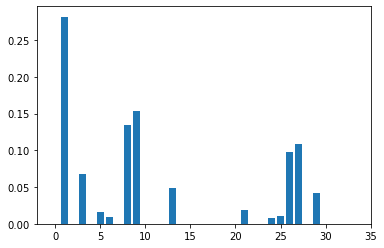

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.07900327152598821
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0046804953795881316
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.00025478261717960614
Attribute subloc_5 has RMSE feature importance difference 7.943748489934136e-05
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.01788336795115528
Attribute subloc_8 has RMSE feature importance difference 0.023692132923393113
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE

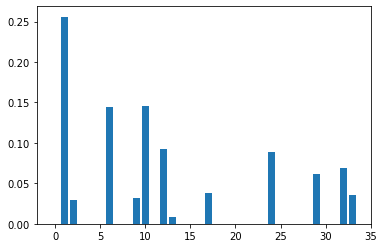

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.06506502009301826
Attribute subloc_0 has RMSE feature importance difference 0.0008765398618701712
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.02073882205618175
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0010096256027142894
Attribute subloc_9 has RMSE feature importance difference 0.021067599029557477
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.008537833772541845
Attribute stage_2A has RMSE fe

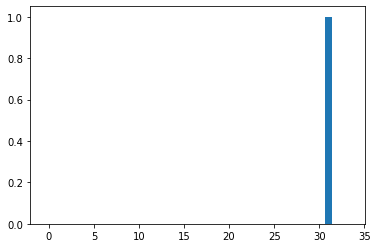

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

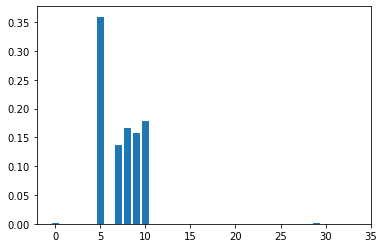

Attribute pat_geslacht_code has RMSE feature importance difference 2.0041177156607268e-06
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.002183573027163e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.12920538291014497
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.018636172744470405
Attribute subloc_7 has RMSE feature importance difference 0.02723171575992281
Attribute subloc_8 has RMSE feature importance difference 0.024818481601251816
Attribute subloc_9 has RMSE feature importance difference 0.03154101913236555
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE fe

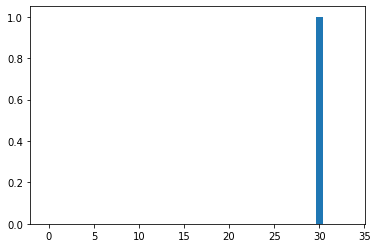

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

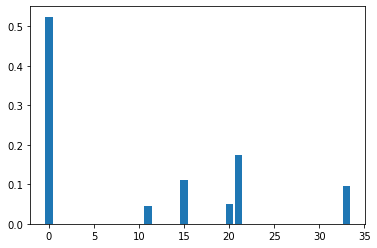

Attribute pat_geslacht_code has RMSE feature importance difference 0.27475133996482554
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0020512115070897364
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B

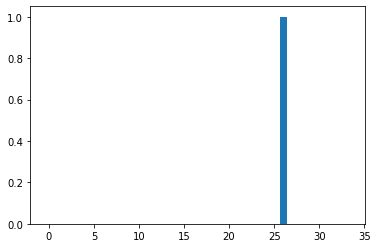

Attribute pat_geslacht_code has RMSE feature importance difference 3.791476935127539e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.143700688232472e-07
Attribute subloc_0 has RMSE feature importance difference 1.553935502306176e-09
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.79734680656595e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

In [12]:
# Do for one DP algorithm at a time
privacy_levels = pb_privacy_levels

pb_FID_ORI, pb_FID, pb_FID_ERRORS = FIDmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
ori: LogisticRegression(C=10, max_iter=4000)
accuracy of original model is 0.7558280351195883
Feature: pat_geslacht_code Score: 0.12264
Feature: tum_differentiatiegraad_code Score: 0.09018
Feature: subloc_0 Score: 0.01105
Feature: subloc_2 Score: 0.00682
Feature: subloc_3 Score: 0.03665
Feature: subloc_4 Score: 0.04029
Feature: subloc_5 Score: 0.02994
Feature: subloc_6 Score: 0.01705
Feature: subloc_7 Score: 0.07178
Feature: subloc_8 Score: 0.01808
Feature: subloc_9 Score: 0.05044
Feature: stage_1 Score: 0.82896
Feature: stage_2 Score: 0.49425
Feature: stage_2A Score: 0.77217
Feature: stage_2B Score: 0.18763
Feature: stage_2C Score: 0.07368
Feature: stage_3 Score: 0.22181
Feature: stage_3A Score: 0.20600
Feature: stage_3B Score: 0.37506
Feature: stage_3C Score: 0.06133
Feature: stage_4 Score: 0.52766
Feature: stage_4A Score: 0.32193
Feature: stage_4B Score: 0.60583
Feat

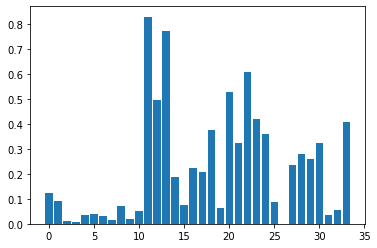

Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=0.1, max_iter=4000)
Feature: pat_geslacht_code Score: 0.08508
Feature: tum_differentiatiegraad_code Score: 0.03675
Feature: subloc_0 Score: 0.01775
Feature: subloc_2 Score: 0.00160
Feature: subloc_3 Score: 0.01734
Feature: subloc_4 Score: 0.02061
Feature: subloc_5 Score: 0.01046
Feature: subloc_6 Score: 0.00982
Feature: subloc_7 Score: 0.05460
Feature: subloc_8 Score: 0.01435
Feature: subloc_9 Score: 0.00217
Feature: stage_1 Score: 0.54669
Feature: stage_2 Score: 0.27555
Feature: stage_2A Score: 0.45816
Feature: stage_2B Score: 0.06326
Feature: stage_2C Score: 0.01579
Feature: stage_3 Score: 0.12116
Feature: stage_3A Score: 0.12925
Feature: stage_3B Score: 0.24993
Feature: stage_3C Score: 0.01651
Feature: stage_4 Score: 0.59533
Feature: stage_4A Score: 0.32710
Feature: stage_4B Score: 0.47625
Feature: stage_4C Score: 0.02647
Feature: stage_M Score: 0.13505
Feature: stage_X Score:

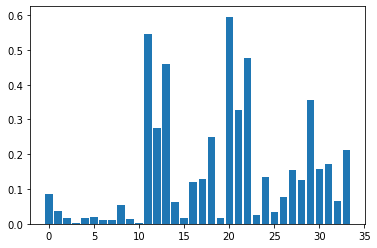

Attribute pat_geslacht_code has squared feature importance difference 5.376424531376876e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 2.079342961432189e-05
Attribute subloc_0 has squared feature importance difference 4.234330899102085e-06
Attribute subloc_2 has squared feature importance difference 3.334904467626647e-07
Attribute subloc_3 has squared feature importance difference 1.9024730226534014e-06
Attribute subloc_4 has squared feature importance difference 1.4617346140922081e-06
Attribute subloc_5 has squared feature importance difference 3.45098903013672e-06
Attribute subloc_6 has squared feature importance difference 8.683393072053134e-08
Attribute subloc_7 has squared feature importance difference 1.8972832463385648e-06
Attribute subloc_8 has squared feature importance difference 2.1515729919007064e-07
Attribute subloc_9 has squared feature importance difference 3.822443919622908e-05
Attribute stage_1 has squared feature importance differ

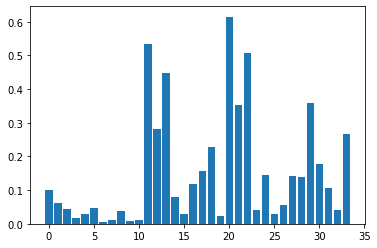

Attribute pat_geslacht_code has squared feature importance difference 9.309131936309392e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.0388421373417483e-09
Attribute subloc_0 has squared feature importance difference 4.7722981934408446e-05
Attribute subloc_2 has squared feature importance difference 5.391934346900164e-06
Attribute subloc_3 has squared feature importance difference 2.910764870652085e-07
Attribute subloc_4 has squared feature importance difference 1.5282675107907095e-05
Attribute subloc_5 has squared feature importance difference 7.151996520402215e-06
Attribute subloc_6 has squared feature importance difference 3.0651955958714715e-08
Attribute subloc_7 has squared feature importance difference 4.756848823713164e-06
Attribute subloc_8 has squared feature importance difference 3.600313026667419e-07
Attribute subloc_9 has squared feature importance difference 1.9889291353323407e-05
Attribute stage_1 has squared feature importance diff

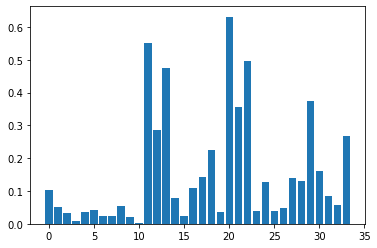

Attribute pat_geslacht_code has squared feature importance difference 1.2544074497767078e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 5.662520589945018e-06
Attribute subloc_0 has squared feature importance difference 2.142720102362286e-05
Attribute subloc_2 has squared feature importance difference 1.0186054593738696e-06
Attribute subloc_3 has squared feature importance difference 3.361964356493036e-06
Attribute subloc_4 has squared feature importance difference 5.912501804433253e-06
Attribute subloc_5 has squared feature importance difference 1.202473393878895e-07
Attribute subloc_6 has squared feature importance difference 5.386221186331261e-06
Attribute subloc_7 has squared feature importance difference 1.0074169820649628e-06
Attribute subloc_8 has squared feature importance difference 3.2599626405602887e-06
Attribute subloc_9 has squared feature importance difference 3.55569911746135e-05
Attribute stage_1 has squared feature importance differ

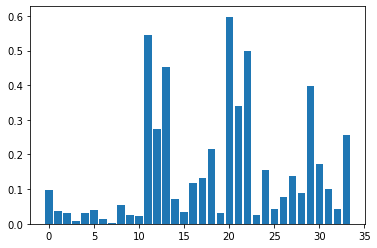

Attribute pat_geslacht_code has squared feature importance difference 6.48805727270558e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.9827621956279496e-05
Attribute subloc_0 has squared feature importance difference 2.0942128055230625e-05
Attribute subloc_2 has squared feature importance difference 5.090110431596782e-07
Attribute subloc_3 has squared feature importance difference 1.7729733268448345e-06
Attribute subloc_4 has squared feature importance difference 5.455309771625247e-06
Attribute subloc_5 has squared feature importance difference 1.982141678341923e-06
Attribute subloc_6 has squared feature importance difference 3.001917802036818e-06
Attribute subloc_7 has squared feature importance difference 6.589596785381438e-07
Attribute subloc_8 has squared feature importance difference 6.828378865793131e-06
Attribute subloc_9 has squared feature importance difference 5.883269717733398e-06
Attribute stage_1 has squared feature importance differe

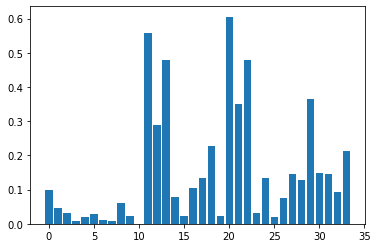

Attribute pat_geslacht_code has squared feature importance difference 8.68588760342005e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.9349471945940405e-06
Attribute subloc_0 has squared feature importance difference 2.18971369041949e-05
Attribute subloc_2 has squared feature importance difference 2.0088754605760572e-07
Attribute subloc_3 has squared feature importance difference 1.037034756075802e-06
Attribute subloc_4 has squared feature importance difference 1.970906920474747e-08
Attribute subloc_5 has squared feature importance difference 3.941112612025581e-06
Attribute subloc_6 has squared feature importance difference 4.0652222929477154e-07
Attribute subloc_7 has squared feature importance difference 5.291169651453258e-06
Attribute subloc_8 has squared feature importance difference 3.940147748086577e-06
Attribute subloc_9 has squared feature importance difference 4.1953518521856375e-05
Attribute stage_1 has squared feature importance differe

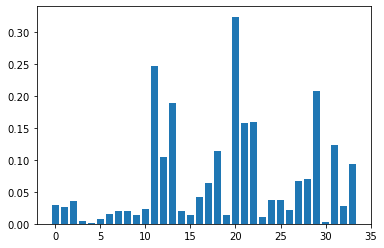

Attribute pat_geslacht_code has squared feature importance difference 1.0371261591990172e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 3.436524957138989e-07
Attribute subloc_0 has squared feature importance difference 0.00019812876547533142
Attribute subloc_2 has squared feature importance difference 9.371645047488346e-07
Attribute subloc_3 has squared feature importance difference 1.990517516682669e-05
Attribute subloc_4 has squared feature importance difference 4.915495810186461e-06
Attribute subloc_5 has squared feature importance difference 7.463580477071946e-06
Attribute subloc_6 has squared feature importance difference 3.649228270478344e-05
Attribute subloc_7 has squared feature importance difference 6.136028362454802e-07
Attribute subloc_8 has squared feature importance difference 1.1626167126238616e-05
Attribute subloc_9 has squared feature importance difference 1.1963626757539515e-05
Attribute stage_1 has squared feature importance diffe

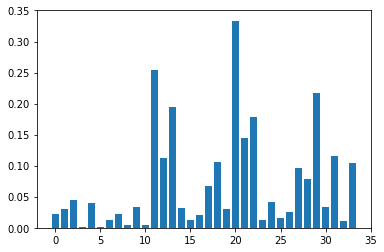

Attribute pat_geslacht_code has squared feature importance difference 4.912085556056549e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.186802026250181e-07
Attribute subloc_0 has squared feature importance difference 0.0002870600483787984
Attribute subloc_2 has squared feature importance difference 2.9543518987245343e-07
Attribute subloc_3 has squared feature importance difference 0.0001315727913369994
Attribute subloc_4 has squared feature importance difference 2.5684883742878966e-05
Attribute subloc_5 has squared feature importance difference 1.1224008765170933e-06
Attribute subloc_6 has squared feature importance difference 5.089345884993072e-05
Attribute subloc_7 has squared feature importance difference 5.802731525787282e-05
Attribute subloc_8 has squared feature importance difference 0.00012182848237174281
Attribute subloc_9 has squared feature importance difference 2.2780998755097633e-05
Attribute stage_1 has squared feature importance diff

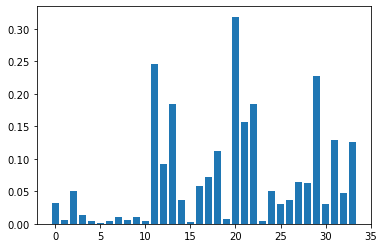

Attribute pat_geslacht_code has squared feature importance difference 8.518097060873192e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.585062906965798e-05
Attribute subloc_0 has squared feature importance difference 0.0003639260180933704
Attribute subloc_2 has squared feature importance difference 2.2696929893947228e-05
Attribute subloc_3 has squared feature importance difference 9.873937619092693e-06
Attribute subloc_4 has squared feature importance difference 2.089477800514064e-05
Attribute subloc_5 has squared feature importance difference 4.635420939607477e-06
Attribute subloc_6 has squared feature importance difference 5.426325071803645e-06
Attribute subloc_7 has squared feature importance difference 4.490944400923963e-05
Attribute subloc_8 has squared feature importance difference 2.9542401278989552e-06
Attribute subloc_9 has squared feature importance difference 2.477844379961384e-05
Attribute stage_1 has squared feature importance differe

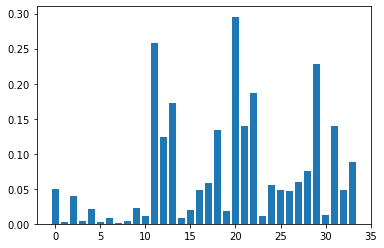

Attribute pat_geslacht_code has squared feature importance difference 2.0192803378446195e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00011037774177429133
Attribute subloc_0 has squared feature importance difference 0.00021621150942043962
Attribute subloc_2 has squared feature importance difference 7.43417496800013e-07
Attribute subloc_3 has squared feature importance difference 1.3069353251328931e-05
Attribute subloc_4 has squared feature importance difference 1.581688641098547e-05
Attribute subloc_5 has squared feature importance difference 6.964082836653913e-08
Attribute subloc_6 has squared feature importance difference 2.286780231463081e-06
Attribute subloc_7 has squared feature importance difference 6.166214150084837e-05
Attribute subloc_8 has squared feature importance difference 4.580823823669175e-05
Attribute subloc_9 has squared feature importance difference 3.270551860761665e-06
Attribute stage_1 has squared feature importance differ

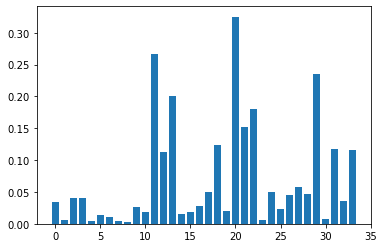

Attribute pat_geslacht_code has squared feature importance difference 3.816892894318448e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 9.060936087826991e-05
Attribute subloc_0 has squared feature importance difference 0.00023216136081080941
Attribute subloc_2 has squared feature importance difference 0.0002564118615274473
Attribute subloc_3 has squared feature importance difference 7.490293385458105e-06
Attribute subloc_4 has squared feature importance difference 2.674236649670404e-07
Attribute subloc_5 has squared feature importance difference 3.3675646993789376e-08
Attribute subloc_6 has squared feature importance difference 5.202084303858751e-07
Attribute subloc_7 has squared feature importance difference 6.904813803807945e-05
Attribute subloc_8 has squared feature importance difference 6.781882813158549e-05
Attribute subloc_9 has squared feature importance difference 1.6624515189596e-06
Attribute stage_1 has squared feature importance differenc

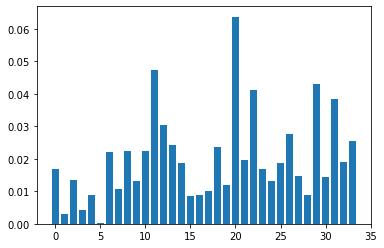

Attribute pat_geslacht_code has squared feature importance difference 7.236500344613512e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 5.61112852483206e-05
Attribute subloc_0 has squared feature importance difference 0.00033214097033392186
Attribute subloc_2 has squared feature importance difference 2.6032392235142255e-05
Attribute subloc_3 has squared feature importance difference 6.285745432133247e-05
Attribute subloc_4 has squared feature importance difference 2.3962509873715753e-05
Attribute subloc_5 has squared feature importance difference 0.0008051743412237401
Attribute subloc_6 has squared feature importance difference 0.00017469484351786277
Attribute subloc_7 has squared feature importance difference 0.0005429956273645694
Attribute subloc_8 has squared feature importance difference 0.00028417076648003893
Attribute subloc_9 has squared feature importance difference 0.0006842864697334458
Attribute stage_1 has squared feature importance diffe

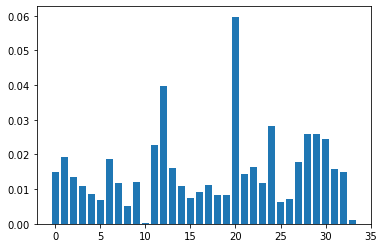

Attribute pat_geslacht_code has squared feature importance difference 0.00015648221076315695
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.000627780302939085
Attribute subloc_0 has squared feature importance difference 0.0005816296808139774
Attribute subloc_2 has squared feature importance difference 0.000398142780369565
Attribute subloc_3 has squared feature importance difference 0.00014028233878655733
Attribute subloc_4 has squared feature importance difference 6.0031236232915243e-05
Attribute subloc_5 has squared feature importance difference 0.0009921069275373765
Attribute subloc_6 has squared feature importance difference 0.0004155071082644223
Attribute subloc_7 has squared feature importance difference 1.9032735841866957e-07
Attribute subloc_8 has squared feature importance difference 0.0004315344673485774
Attribute subloc_9 has squared feature importance difference 3.995607340399409e-05
Attribute stage_1 has squared feature importance differe

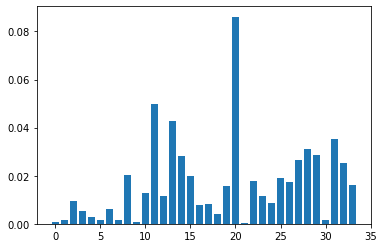

Attribute pat_geslacht_code has squared feature importance difference 0.00021447665593822578
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.476594551475105e-05
Attribute subloc_0 has squared feature importance difference 0.00022289189102258408
Attribute subloc_2 has squared feature importance difference 6.74209240131085e-05
Attribute subloc_3 has squared feature importance difference 1.8632215432539204e-08
Attribute subloc_4 has squared feature importance difference 7.770440043428377e-06
Attribute subloc_5 has squared feature importance difference 4.983870391920132e-05
Attribute subloc_6 has squared feature importance difference 1.481033763026529e-07
Attribute subloc_7 has squared feature importance difference 0.0006590090106506784
Attribute subloc_8 has squared feature importance difference 1.8379717985536493e-06
Attribute subloc_9 has squared feature importance difference 0.00023312112083175853
Attribute stage_1 has squared feature importance diffe

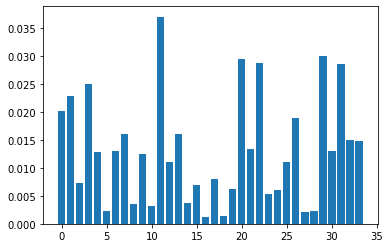

Attribute pat_geslacht_code has squared feature importance difference 0.0008320509569159828
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.001507350183339392
Attribute subloc_0 has squared feature importance difference 0.00021942008901741723
Attribute subloc_2 has squared feature importance difference 0.0030158492803190385
Attribute subloc_3 has squared feature importance difference 0.0005615589629347459
Attribute subloc_4 has squared feature importance difference 5.94447928837884e-08
Attribute subloc_5 has squared feature importance difference 0.0006193927377049491
Attribute subloc_6 has squared feature importance difference 0.00112720802964587
Attribute subloc_7 has squared feature importance difference 2.5484701790856263e-06
Attribute subloc_8 has squared feature importance difference 0.0006482213703879179
Attribute subloc_9 has squared feature importance difference 3.082931666402742e-07
Attribute stage_1 has squared feature importance difference 

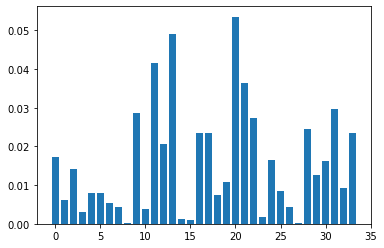

Attribute pat_geslacht_code has squared feature importance difference 0.0002448775332432824
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.0641950284753484e-07
Attribute subloc_0 has squared feature importance difference 0.0006158172108383996
Attribute subloc_2 has squared feature importance difference 2.1057094143623885e-05
Attribute subloc_3 has squared feature importance difference 9.911953960268694e-05
Attribute subloc_4 has squared feature importance difference 8.724267218048528e-05
Attribute subloc_5 has squared feature importance difference 3.8059376252950145e-05
Attribute subloc_6 has squared feature importance difference 3.526113396520799e-05
Attribute subloc_7 has squared feature importance difference 8.237266154822876e-05
Attribute subloc_8 has squared feature importance difference 0.00254802265857304
Attribute subloc_9 has squared feature importance difference 4.0026327113684746e-07
Attribute stage_1 has squared feature importance differe

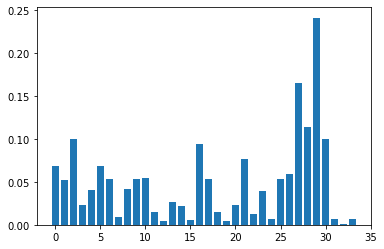

Attribute pat_geslacht_code has squared feature importance difference 0.0005802177123758193
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00033895202078238444
Attribute subloc_0 has squared feature importance difference 0.003252404104534298
Attribute subloc_2 has squared feature importance difference 0.00015580139502429545
Attribute subloc_3 has squared feature importance difference 0.00035331500752020374
Attribute subloc_4 has squared feature importance difference 0.001233563268048643
Attribute subloc_5 has squared feature importance difference 0.0007387852242595625
Attribute subloc_6 has squared feature importance difference 7.704143915993971e-06
Attribute subloc_7 has squared feature importance difference 0.00021873272995331862
Attribute subloc_8 has squared feature importance difference 0.000830328130164519
Attribute subloc_9 has squared feature importance difference 0.0006260817298236467
Attribute stage_1 has squared feature importance differen

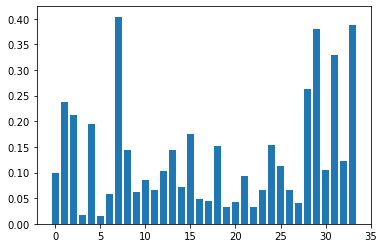

Attribute pat_geslacht_code has squared feature importance difference 3.069513038216329e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0016050989411280606
Attribute subloc_0 has squared feature importance difference 0.002048449841882699
Attribute subloc_2 has squared feature importance difference 8.672606218509605e-06
Attribute subloc_3 has squared feature importance difference 0.0014296462881009959
Attribute subloc_4 has squared feature importance difference 3.190734960535512e-06
Attribute subloc_5 has squared feature importance difference 7.69606550193175e-05
Attribute subloc_6 has squared feature importance difference 0.007450099721295273
Attribute subloc_7 has squared feature importance difference 0.0004911375451826417
Attribute subloc_8 has squared feature importance difference 0.00012760662278952988
Attribute subloc_9 has squared feature importance difference 0.00014337611510253408
Attribute stage_1 has squared feature importance difference

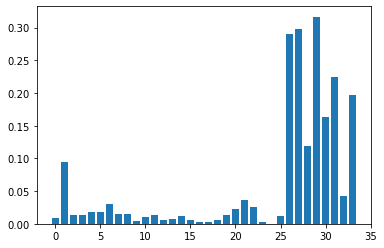

Attribute pat_geslacht_code has squared feature importance difference 0.00014660905089024104
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0011562520722603886
Attribute subloc_0 has squared feature importance difference 2.7843356873558595e-05
Attribute subloc_2 has squared feature importance difference 3.171413975528745e-05
Attribute subloc_3 has squared feature importance difference 1.777653026414289e-05
Attribute subloc_4 has squared feature importance difference 1.3400331929026403e-05
Attribute subloc_5 has squared feature importance difference 0.0001162856020526895
Attribute subloc_6 has squared feature importance difference 2.5796020830611363e-05
Attribute subloc_7 has squared feature importance difference 4.098265508478909e-06
Attribute subloc_8 has squared feature importance difference 1.9544382147857724e-07
Attribute subloc_9 has squared feature importance difference 2.5091800690816723e-06
Attribute stage_1 has squared feature importance dif

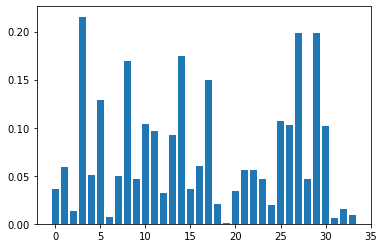

Attribute pat_geslacht_code has squared feature importance difference 2.910303313983712e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00013441542965148855
Attribute subloc_0 has squared feature importance difference 1.430091310516961e-05
Attribute subloc_2 has squared feature importance difference 0.007052116984918324
Attribute subloc_3 has squared feature importance difference 0.00023580536990109997
Attribute subloc_4 has squared feature importance difference 0.0020478317122001833
Attribute subloc_5 has squared feature importance difference 1.3831999713674e-06
Attribute subloc_6 has squared feature importance difference 0.0002968626281644501
Attribute subloc_7 has squared feature importance difference 0.003263904303176365
Attribute subloc_8 has squared feature importance difference 0.0002560548992253537
Attribute subloc_9 has squared feature importance difference 0.0011788005292218471
Attribute stage_1 has squared feature importance difference 

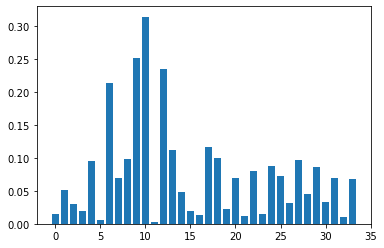

Attribute pat_geslacht_code has squared feature importance difference 0.00010742470729046198
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.434525059143903e-05
Attribute subloc_0 has squared feature importance difference 0.00010112495792653463
Attribute subloc_2 has squared feature importance difference 4.231818050056132e-05
Attribute subloc_3 has squared feature importance difference 0.0010127682141121614
Attribute subloc_4 has squared feature importance difference 1.0636733713659422e-05
Attribute subloc_5 has squared feature importance difference 0.006089310096356901
Attribute subloc_6 has squared feature importance difference 0.0006074848497399119
Attribute subloc_7 has squared feature importance difference 0.0008006085742930793
Attribute subloc_8 has squared feature importance difference 0.00881713999264658
Attribute subloc_9 has squared feature importance difference 0.012920944242003964
Attribute stage_1 has squared feature importance difference

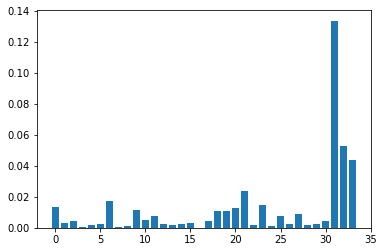

Attribute pat_geslacht_code has squared feature importance difference 0.0002433737402779381
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.6838212528825766e-05
Attribute subloc_0 has squared feature importance difference 7.50070775693722e-05
Attribute subloc_2 has squared feature importance difference 7.661313392706548e-07
Attribute subloc_3 has squared feature importance difference 4.457244188710188e-08
Attribute subloc_4 has squared feature importance difference 1.5525829070423078e-07
Attribute subloc_5 has squared feature importance difference 0.0014339391083959977
Attribute subloc_6 has squared feature importance difference 3.7663930305417244e-07
Attribute subloc_7 has squared feature importance difference 3.53814532428212e-05
Attribute subloc_8 has squared feature importance difference 0.000661209700540694
Attribute subloc_9 has squared feature importance difference 2.5954109680619763e-05
Attribute stage_1 has squared feature importance differen

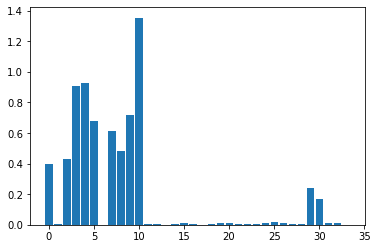

Attribute pat_geslacht_code has squared feature importance difference 0.0016271557003203904
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00012151563660784502
Attribute subloc_0 has squared feature importance difference 0.0035145228775162966
Attribute subloc_2 has squared feature importance difference 0.016353780268526838
Attribute subloc_3 has squared feature importance difference 0.016070341543760046
Attribute subloc_4 has squared feature importance difference 0.008278760851969642
Attribute subloc_5 has squared feature importance difference 1.5396791559596125e-05
Attribute subloc_6 has squared feature importance difference 0.007185694511150792
Attribute subloc_7 has squared feature importance difference 0.0034706582509911976
Attribute subloc_8 has squared feature importance difference 0.009808414956233006
Attribute subloc_9 has squared feature importance difference 0.0342625403642346
Attribute stage_1 has squared feature importance difference 0.01

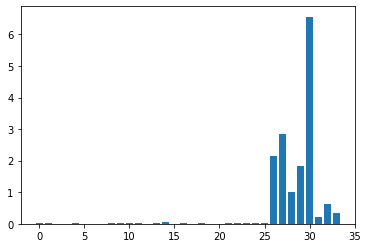

Attribute pat_geslacht_code has squared feature importance difference 0.00020420082902629057
Attribute tum_differentiatiegraad_code has squared feature importance difference 9.022808765685129e-05
Attribute subloc_0 has squared feature importance difference 1.257718190044358e-06
Attribute subloc_2 has squared feature importance difference 1.7317786801725408e-07
Attribute subloc_3 has squared feature importance difference 1.573145806752138e-05
Attribute subloc_4 has squared feature importance difference 2.788395039922382e-05
Attribute subloc_5 has squared feature importance difference 1.1665832068983624e-05
Attribute subloc_6 has squared feature importance difference 4.781435172061285e-06
Attribute subloc_7 has squared feature importance difference 7.718318214848822e-05
Attribute subloc_8 has squared feature importance difference 9.76806970405387e-07
Attribute subloc_9 has squared feature importance difference 1.9972477273025413e-05
Attribute stage_1 has squared feature importance differ

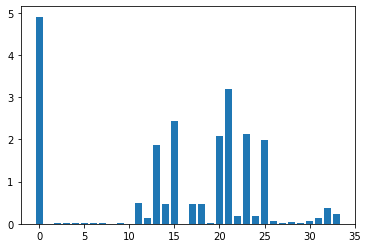

Attribute pat_geslacht_code has squared feature importance difference 0.04225554378461597
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00013381390032388133
Attribute subloc_0 has squared feature importance difference 4.2894215609837807e-07
Attribute subloc_2 has squared feature importance difference 3.3291578632056563e-08
Attribute subloc_3 has squared feature importance difference 2.008320347636436e-05
Attribute subloc_4 has squared feature importance difference 2.352151553182966e-05
Attribute subloc_5 has squared feature importance difference 1.1620819834116985e-05
Attribute subloc_6 has squared feature importance difference 3.610212203851619e-06
Attribute subloc_7 has squared feature importance difference 8.308844643585333e-05
Attribute subloc_8 has squared feature importance difference 3.1533662179934497e-06
Attribute subloc_9 has squared feature importance difference 4.036551157356617e-05
Attribute stage_1 has squared feature importance differ

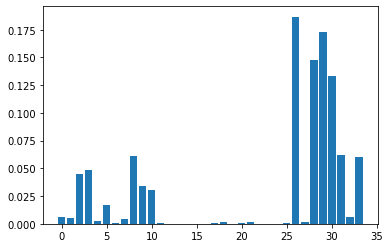

Attribute pat_geslacht_code has squared feature importance difference 0.00010297744261702967
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.20830611127586e-05
Attribute subloc_0 has squared feature importance difference 0.0017949172717010627
Attribute subloc_2 has squared feature importance difference 0.002138667572304214
Attribute subloc_3 has squared feature importance difference 6.007719871780438e-06
Attribute subloc_4 has squared feature importance difference 0.00013276022870150857
Attribute subloc_5 has squared feature importance difference 1.327627556762325e-05
Attribute subloc_6 has squared feature importance difference 5.4345822159567356e-06
Attribute subloc_7 has squared feature importance difference 0.0025128026478472257
Attribute subloc_8 has squared feature importance difference 0.0009417446003534655
Attribute subloc_9 has squared feature importance difference 0.0005244922800890589
Attribute stage_1 has squared feature importance differen

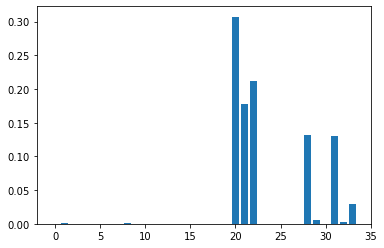

syn: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
Feature: pat_geslacht_code Score: 0.00041
Feature: tum_differentiatiegraad_code Score: 0.00042
Feature: subloc_0 Score: 0.00111
Feature: subloc_2 Score: 0.00000
Feature: subloc_3 Score: 0.00000
Feature: subloc_4 Score: 0.00000
Feature: subloc_5 Score: 0.00000
Feature: subloc_6 Score: 0.00000
Feature: subloc_7 Score: 0.00000
Feature: subloc_8 Score: 0.00000
Feature: subloc_9 Score: 0.00000
Feature: stage_1 Score: 0.00000
Feature: stage_2 Score: 0.00000
Feature: stage_2A Score: 0.00000
Feature: stage_2B Score: 0.00000
Feature: stage_2C Score: 0.00000
Feature: stage_3 Score: 0.00000
Feature: stage_3A Score: 0.00000
Feature: stage_3B Score: 0.00000
Feature: stage_3C Score: 0.00000
Feature: stage_4 Score: 0.31903
Feature: stage_4A Score: 0.16292
Feature: stage_4B Score: 0.19194
Feature: stage_4C Score: 0.00000
Feature: stage_M Score: 0.00000
Feature: stage_X Score: 0.00000
Feature: diagnosis_age_0-20 Score

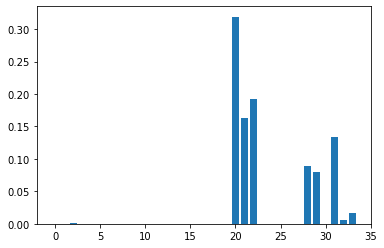

Attribute pat_geslacht_code has squared feature importance difference 4.526793854880678e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 2.312691388864582e-07
Attribute subloc_0 has squared feature importance difference 1.1479013400660544e-06
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

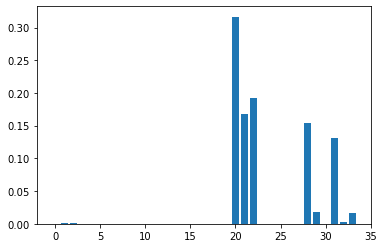

Attribute pat_geslacht_code has squared feature importance difference 2.5767808314696948e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.585087766359465e-07
Attribute subloc_0 has squared feature importance difference 1.2233380587797798e-06
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 7.967113734027965e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diff

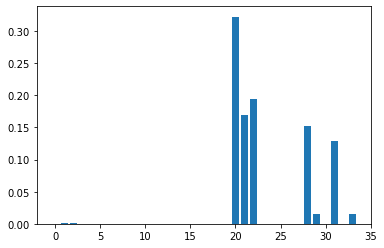

Attribute pat_geslacht_code has squared feature importance difference 2.9744112572138983e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 2.7726531903324616e-08
Attribute subloc_0 has squared feature importance difference 3.172306090788609e-06
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 4.7292668907486325e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance dif

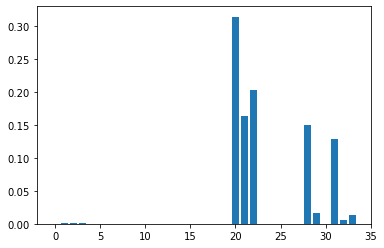

Attribute pat_geslacht_code has squared feature importance difference 1.764665039927755e-10
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.3715933534462445e-07
Attribute subloc_0 has squared feature importance difference 8.571048237465891e-07
Attribute subloc_2 has squared feature importance difference 2.53520271001045e-07
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature

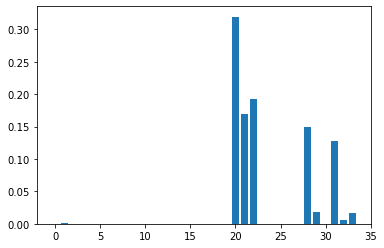

Attribute pat_geslacht_code has squared feature importance difference 5.432125357501915e-09
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.022850768451624e-08
Attribute subloc_0 has squared feature importance difference 1.4708850231276471e-07
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 2.32533069749099e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

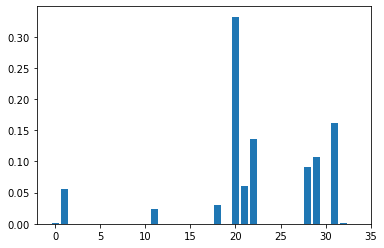

Attribute pat_geslacht_code has squared feature importance difference 3.886083990402672e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0030559012068444038
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0005683747667914508
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared featur

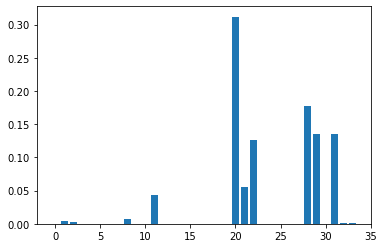

Attribute pat_geslacht_code has squared feature importance difference 2.965946243465726e-09
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.2355552936429653e-05
Attribute subloc_0 has squared feature importance difference 5.8210349450060595e-06
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 3.31383820760964e-05
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.001840844201230961
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature

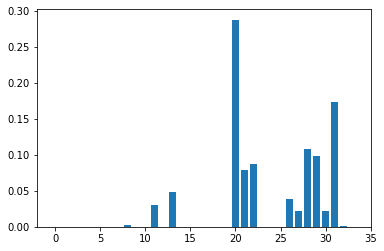

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.052100331177954e-06
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0008981457542429765
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature

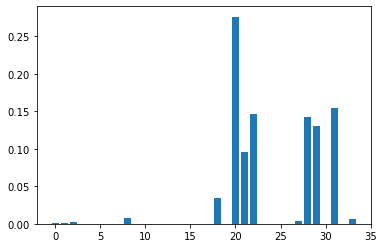

Attribute pat_geslacht_code has squared feature importance difference 9.42787824793029e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 7.250210995968576e-09
Attribute subloc_0 has squared feature importance difference 3.6157071953785076e-06
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 4.3434219160731654e-05
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

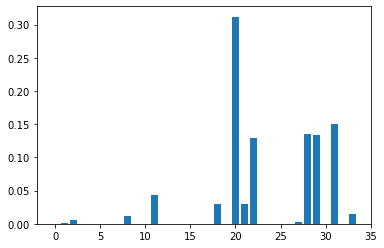

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 7.225145533373659e-08
Attribute subloc_0 has squared feature importance difference 3.443191845706711e-05
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.00011430916801420081
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0018575493548873242
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature

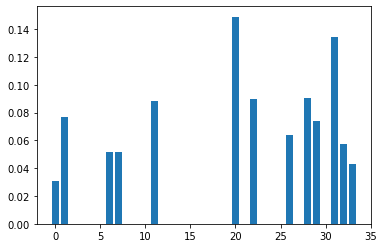

Attribute pat_geslacht_code has squared feature importance difference 0.0009465265240561495
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.005708882681110671
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.002663876720728831
Attribute subloc_6 has squared feature importance difference 0.0026799882703229293
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.007751598223090106
Attribute stage_2 has squared feature importance difference 0.0
Attr

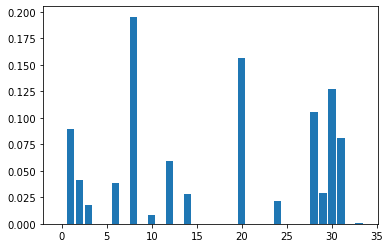

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.007923819204525432
Attribute subloc_0 has squared feature importance difference 0.0016672186388283657
Attribute subloc_2 has squared feature importance difference 0.00032900007704875353
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0014840800875745715
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.03782842318887507
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 6.372594240708866e-05
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0035362

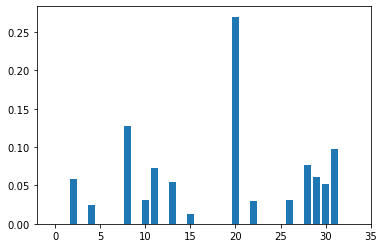

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 0.0034480446900850563
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0005734138310899389
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.016134154408740366
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0009925081135640419
Attribute stage_1 has squared feature importance difference 0.005340206578691869
Attribute stage_2 has squared feature importance difference 0.0
Attri

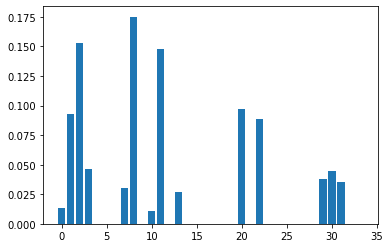

Attribute pat_geslacht_code has squared feature importance difference 0.00017130946396344058
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.008518607702199976
Attribute subloc_0 has squared feature importance difference 0.023269214404642233
Attribute subloc_2 has squared feature importance difference 0.002116681520225843
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0009356179169696636
Attribute subloc_7 has squared feature importance difference 0.030364128145308575
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.00011887394537414846
Attribute stage_1 has squared feature importance difference 0.021898037988512063
Attribute stage_2 has squared feature importance di

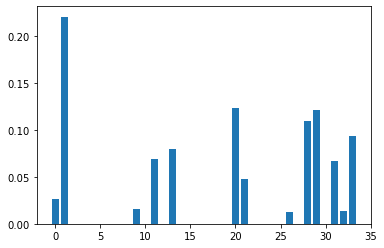

Attribute pat_geslacht_code has squared feature importance difference 0.0006726225815925003
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.04826110570715833
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.00024393608879899495
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.004813134552061273
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A ha

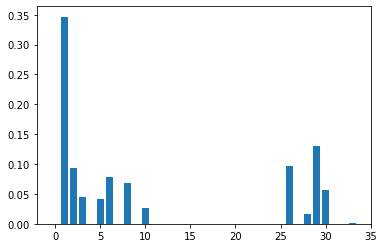

Attribute pat_geslacht_code has squared feature importance difference 3.6925614678911325e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.11959073197961038
Attribute subloc_0 has squared feature importance difference 0.008602556072894224
Attribute subloc_2 has squared feature importance difference 0.0019648619395896236
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0017317981463101303
Attribute subloc_5 has squared feature importance difference 0.006088362675720028
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.004541954380224488
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0007001776596037198
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance dif

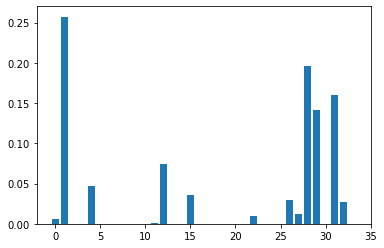

Attribute pat_geslacht_code has squared feature importance difference 4.030917821663494e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.06576533434372453
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.002249203406018223
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 1.6747321386400231e-06
Attribute stage_2 has squared feature importance difference 0.005453127496368082
Attr

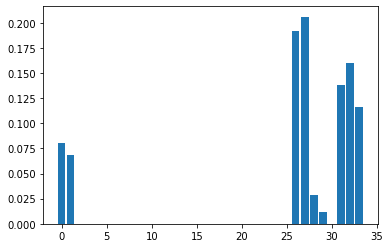

Attribute pat_geslacht_code has squared feature importance difference 0.006367293729358518
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.004556667906514346
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differe

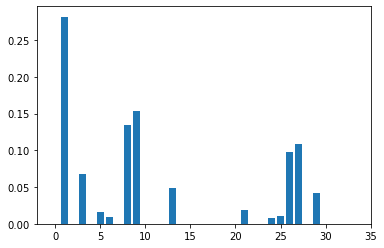

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.07900327152598821
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0046804953795881316
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.00025478261717960614
Attribute subloc_5 has squared feature importance difference 7.943748489934136e-05
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.01788336795115528
Attribute subloc_8 has squared feature importance difference 0.023692132923393113
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance dif

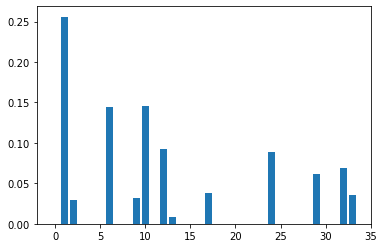

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.06506502009301823
Attribute subloc_0 has squared feature importance difference 0.0008765398618701708
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.02073882205618174
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.001009625602714289
Attribute subloc_9 has squared feature importance difference 0.02106759902955747
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.008537833772

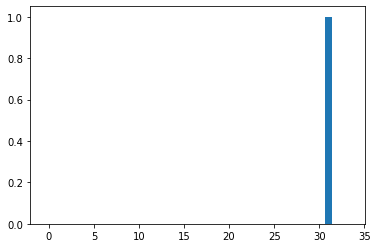

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

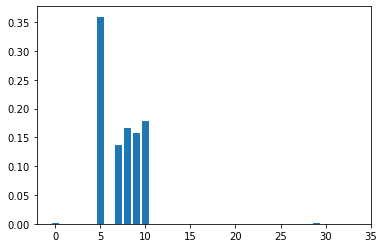

Attribute pat_geslacht_code has squared feature importance difference 2.0041177156607268e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.002183573027165e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.12920538291014497
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.018636172744470405
Attribute subloc_7 has squared feature importance difference 0.02723171575992281
Attribute subloc_8 has squared feature importance difference 0.024818481601251816
Attribute subloc_9 has squared feature importance difference 0.03154101913236555
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance diffe

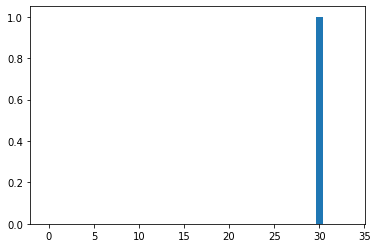

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

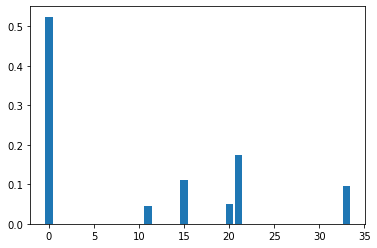

Attribute pat_geslacht_code has squared feature importance difference 0.27475133996482565
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.002051211507089737
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature i

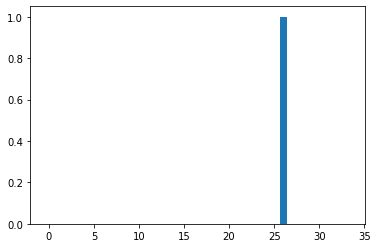

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

In [13]:
# Do for one DP algorithm at a time for normalized coefficients
privacy_levels = pb_privacy_levels

norm_pb_FID_ORI, norm_pb_FID, norm_pb_FID_ERRORS = NormalizedFIDmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
ori: LogisticRegression(C=10, max_iter=4000)
accuracy of original model is 0.7558280351195883
Feature: pat_geslacht_code Score: 0.12264
Feature: tum_differentiatiegraad_code Score: 0.09018
Feature: subloc_0 Score: 0.01105
Feature: subloc_2 Score: 0.00682
Feature: subloc_3 Score: 0.03665
Feature: subloc_4 Score: 0.04029
Feature: subloc_5 Score: 0.02994
Feature: subloc_6 Score: 0.01705
Feature: subloc_7 Score: 0.07178
Feature: subloc_8 Score: 0.01808
Feature: subloc_9 Score: 0.05044
Feature: stage_1 Score: 0.82896
Feature: stage_2 Score: 0.49425
Feature: stage_2A Score: 0.77217
Feature: stage_2B Score: 0.18763
Feature: stage_2C Score: 0.07368
Feature: stage_3 Score: 0.22181
Feature: stage_3A Score: 0.20600
Feature: stage_3B Score: 0.37506
Feature: stage_3C Score: 0.06133
Feature: stage_4 Score: 0.52766
Feature: stage_4A Score: 0.32193
Feature: stage_4B Score: 0.60583
Feat

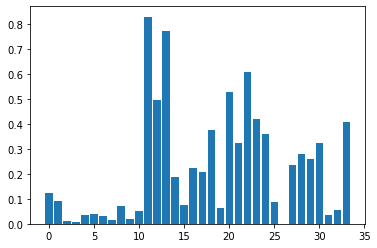

Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=0.0001, max_iter=4000)
Feature: pat_geslacht_code Score: 0.00243
Feature: tum_differentiatiegraad_code Score: 0.00031
Feature: subloc_0 Score: 0.00149
Feature: subloc_2 Score: 0.00084
Feature: subloc_3 Score: 0.00025
Feature: subloc_4 Score: 0.00235
Feature: subloc_5 Score: 0.00120
Feature: subloc_6 Score: 0.00120
Feature: subloc_7 Score: 0.00376
Feature: subloc_8 Score: 0.00005
Feature: subloc_9 Score: 0.00028
Feature: stage_1 Score: 0.00056
Feature: stage_2 Score: 0.00121
Feature: stage_2A Score: 0.00178
Feature: stage_2B Score: 0.00027
Feature: stage_2C Score: 0.00005
Feature: stage_3 Score: 0.00006
Feature: stage_3A Score: 0.00069
Feature: stage_3B Score: 0.00066
Feature: stage_3C Score: 0.00053
Feature: stage_4 Score: 0.00041
Feature: stage_4A Score: 0.00065
Feature: stage_4B Score: 0.00030
Feature: stage_4C Score: 0.00005
Feature: stage_M Score: 0.00039
Feature: stage_X Sco

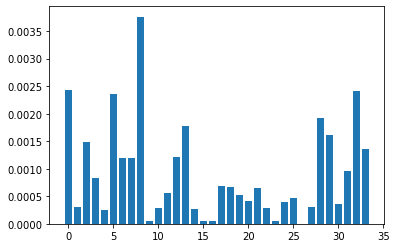

Attribute pat_geslacht_code has squared feature importance difference 0.003847390331880068
Attribute tum_differentiatiegraad_code has squared feature importance difference 3.4638280157896857e-06
Attribute subloc_0 has squared feature importance difference 0.002152299488178321
Attribute subloc_2 has squared feature importance difference 0.0006753479157952163
Attribute subloc_3 has squared feature importance difference 9.915609719384654e-06
Attribute subloc_4 has squared feature importance difference 0.004931179727934076
Attribute subloc_5 has squared feature importance difference 0.0011960993620447058
Attribute subloc_6 has squared feature importance difference 0.001313294923109309
Attribute subloc_7 has squared feature importance difference 0.012378161718714458
Attribute subloc_8 has squared feature importance difference 4.905213723673037e-07
Attribute subloc_9 has squared feature importance difference 6.290519184661105e-06
Attribute stage_1 has squared feature importance difference 0.

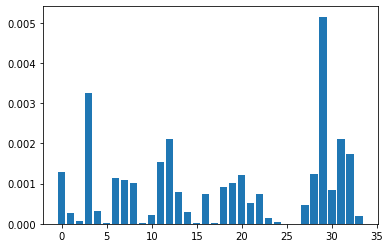

Attribute pat_geslacht_code has squared feature importance difference 0.0006787241532336478
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.202293390074922e-06
Attribute subloc_0 has squared feature importance difference 2.8578272562378237e-07
Attribute subloc_2 has squared feature importance difference 0.011046631045803543
Attribute subloc_3 has squared feature importance difference 3.336700398643207e-05
Attribute subloc_4 has squared feature importance difference 1.8338015622213294e-05
Attribute subloc_5 has squared feature importance difference 0.001108959357951372
Attribute subloc_6 has squared feature importance difference 0.0011038861773041814
Attribute subloc_7 has squared feature importance difference 0.0005622160846685526
Attribute subloc_8 has squared feature importance difference 1.9189588678869165e-06
Attribute subloc_9 has squared feature importance difference 2.62224983495278e-07
Attribute stage_1 has squared feature importance differenc

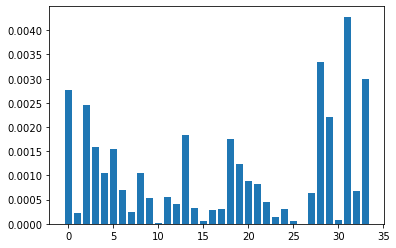

Attribute pat_geslacht_code has squared feature importance difference 0.003744998522153237
Attribute tum_differentiatiegraad_code has squared feature importance difference 2.8194747817879708e-05
Attribute subloc_0 has squared feature importance difference 0.004532708715401461
Attribute subloc_2 has squared feature importance difference 0.0019118329635743564
Attribute subloc_3 has squared feature importance difference 0.0006006863350309558
Attribute subloc_4 has squared feature importance difference 0.0014203100340478315
Attribute subloc_5 has squared feature importance difference 0.000244432734332166
Attribute subloc_6 has squared feature importance difference 1.9085391651401734e-05
Attribute subloc_7 has squared feature importance difference 0.0003951186128197588
Attribute subloc_8 has squared feature importance difference 0.000153663440695259
Attribute subloc_9 has squared feature importance difference 3.978854406727686e-05
Attribute stage_1 has squared feature importance difference 

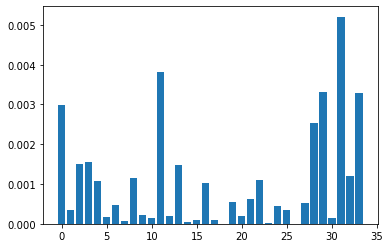

Attribute pat_geslacht_code has squared feature importance difference 0.004494492709431357
Attribute tum_differentiatiegraad_code has squared feature importance difference 5.5387121275427555e-06
Attribute subloc_0 has squared feature importance difference 0.001632216629573736
Attribute subloc_2 has squared feature importance difference 0.001810989078439593
Attribute subloc_3 has squared feature importance difference 0.0006296573365086756
Attribute subloc_4 has squared feature importance difference 3.003134508483408e-07
Attribute subloc_5 has squared feature importance difference 8.756168203715069e-05
Attribute subloc_6 has squared feature importance difference 3.032408983520334e-07
Attribute subloc_7 has squared feature importance difference 0.0005059170876105496
Attribute subloc_8 has squared feature importance difference 1.2397310856506204e-05
Attribute subloc_9 has squared feature importance difference 7.523203116732892e-06
Attribute stage_1 has squared feature importance difference

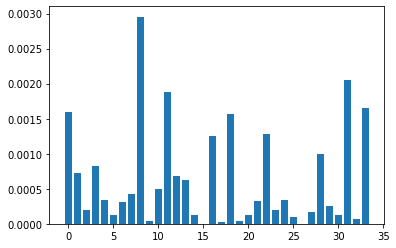

Attribute pat_geslacht_code has squared feature importance difference 0.003194115485446527
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0004522406040436616
Attribute subloc_0 has squared feature importance difference 5.856607301495587e-05
Attribute subloc_2 has squared feature importance difference 0.0013652856571672138
Attribute subloc_3 has squared feature importance difference 0.00011098155893177252
Attribute subloc_4 has squared feature importance difference 4.0867981008658675e-07
Attribute subloc_5 has squared feature importance difference 0.00010799882123206298
Attribute subloc_6 has squared feature importance difference 0.000284341791472154
Attribute subloc_7 has squared feature importance difference 0.01571163892815287
Attribute subloc_8 has squared feature importance difference 2.8514777099854104e-07
Attribute subloc_9 has squared feature importance difference 0.0002625212562925583
Attribute stage_1 has squared feature importance differenc

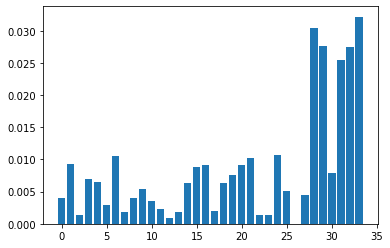

Attribute pat_geslacht_code has squared feature importance difference 5.817889180138595e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00039035114675554347
Attribute subloc_0 has squared feature importance difference 9.694155656846357e-06
Attribute subloc_2 has squared feature importance difference 0.0005209826481632229
Attribute subloc_3 has squared feature importance difference 0.0003019414562308698
Attribute subloc_4 has squared feature importance difference 2.1717083368321157e-05
Attribute subloc_5 has squared feature importance difference 0.0010040955069397016
Attribute subloc_6 has squared feature importance difference 1.626459287095701e-05
Attribute subloc_7 has squared feature importance difference 1.8074795519774505e-05
Attribute subloc_8 has squared feature importance difference 0.00026143396073199547
Attribute subloc_9 has squared feature importance difference 2.9019409448905995e-05
Attribute stage_1 has squared feature importance diff

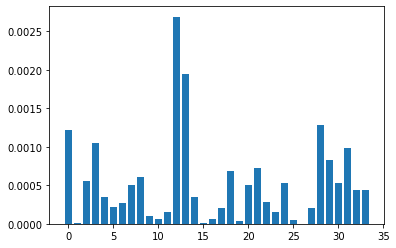

Attribute pat_geslacht_code has squared feature importance difference 0.0026687413734865703
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00013219567647326772
Attribute subloc_0 has squared feature importance difference 0.0008666474251396893
Attribute subloc_2 has squared feature importance difference 0.0032510251126485375
Attribute subloc_3 has squared feature importance difference 0.00020465571891493703
Attribute subloc_4 has squared feature importance difference 4.980236200368039e-05
Attribute subloc_5 has squared feature importance difference 0.00012998899773090613
Attribute subloc_6 has squared feature importance difference 0.0006546878692289185
Attribute subloc_7 has squared feature importance difference 0.0006067235815738023
Attribute subloc_8 has squared feature importance difference 9.851531431296858e-06
Attribute subloc_9 has squared feature importance difference 9.48011820784074e-06
Attribute stage_1 has squared feature importance differe

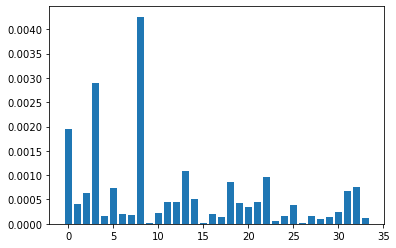

Attribute pat_geslacht_code has squared feature importance difference 0.006302039046816891
Attribute tum_differentiatiegraad_code has squared feature importance difference 7.281162161579163e-05
Attribute subloc_0 has squared feature importance difference 0.0008609663369567742
Attribute subloc_2 has squared feature importance difference 0.019921674790049183
Attribute subloc_3 has squared feature importance difference 8.046534489706945e-06
Attribute subloc_4 has squared feature importance difference 0.0009400160642570887
Attribute subloc_5 has squared feature importance difference 3.835125260493976e-05
Attribute subloc_6 has squared feature importance difference 5.019973212325294e-05
Attribute subloc_7 has squared feature importance difference 0.0400155399086093
Attribute subloc_8 has squared feature importance difference 2.8079026904831366e-06
Attribute subloc_9 has squared feature importance difference 1.7747598449899843e-05
Attribute stage_1 has squared feature importance difference 0

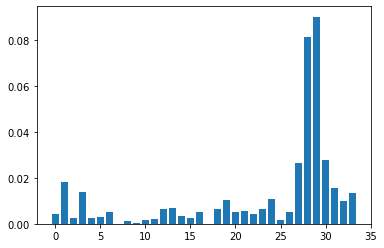

Attribute pat_geslacht_code has squared feature importance difference 3.481221753230532e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0011279752379764732
Attribute subloc_0 has squared feature importance difference 1.9251133843742658e-05
Attribute subloc_2 has squared feature importance difference 0.0011119838718209947
Attribute subloc_3 has squared feature importance difference 3.976098912124891e-06
Attribute subloc_4 has squared feature importance difference 5.373390154527169e-06
Attribute subloc_5 has squared feature importance difference 7.81159153664957e-05
Attribute subloc_6 has squared feature importance difference 4.960871513853262e-06
Attribute subloc_7 has squared feature importance difference 4.2744017470118637e-05
Attribute subloc_8 has squared feature importance difference 3.817195920063593e-06
Attribute subloc_9 has squared feature importance difference 8.193395334035176e-06
Attribute stage_1 has squared feature importance differen

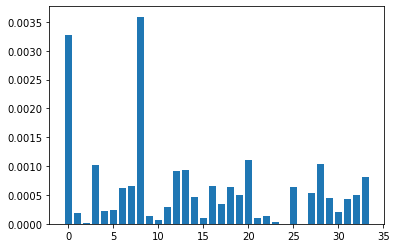

Attribute pat_geslacht_code has squared feature importance difference 0.019916174094450945
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.198842161067108e-06
Attribute subloc_0 has squared feature importance difference 5.238575010130754e-07
Attribute subloc_2 has squared feature importance difference 0.0022949636566295846
Attribute subloc_3 has squared feature importance difference 3.7510357891728736e-05
Attribute subloc_4 has squared feature importance difference 3.495951221935568e-05
Attribute subloc_5 has squared feature importance difference 0.000665284658162272
Attribute subloc_6 has squared feature importance difference 0.0008731877372418244
Attribute subloc_7 has squared feature importance difference 0.026571984590615473
Attribute subloc_8 has squared feature importance difference 1.5733020929032948e-05
Attribute subloc_9 has squared feature importance difference 1.4763841905167105e-05
Attribute stage_1 has squared feature importance differenc

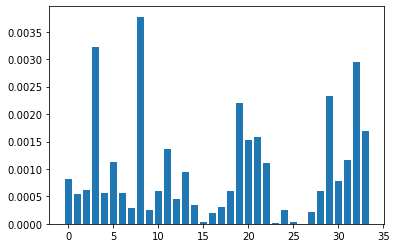

Attribute pat_geslacht_code has squared feature importance difference 7.282219459203914e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.9228707102801875e-05
Attribute subloc_0 has squared feature importance difference 0.0002881210942746395
Attribute subloc_2 has squared feature importance difference 0.009417150290054948
Attribute subloc_3 has squared feature importance difference 0.00014894553534964538
Attribute subloc_4 has squared feature importance difference 0.0008328522549791026
Attribute subloc_5 has squared feature importance difference 0.00017730896917936316
Attribute subloc_6 has squared feature importance difference 4.0636101131562125e-05
Attribute subloc_7 has squared feature importance difference 0.011028252820741404
Attribute subloc_8 has squared feature importance difference 2.776782528326641e-05
Attribute subloc_9 has squared feature importance difference 0.00012982162965165432
Attribute stage_1 has squared feature importance differ

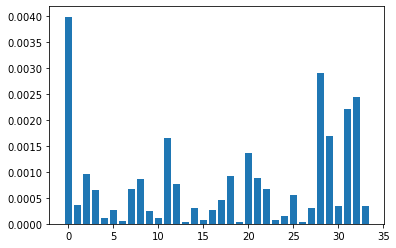

Attribute pat_geslacht_code has squared feature importance difference 0.017747371919385545
Attribute tum_differentiatiegraad_code has squared feature importance difference 2.324275964248833e-06
Attribute subloc_0 has squared feature importance difference 0.001205115557811656
Attribute subloc_2 has squared feature importance difference 0.0005584041750831645
Attribute subloc_3 has squared feature importance difference 1.0669070488515729e-07
Attribute subloc_4 has squared feature importance difference 1.8815418084197178e-05
Attribute subloc_5 has squared feature importance difference 4.6556406045963996e-06
Attribute subloc_6 has squared feature importance difference 0.0005137498680588266
Attribute subloc_7 has squared feature importance difference 0.0005231950973663951
Attribute subloc_8 has squared feature importance difference 4.4599196883968416e-05
Attribute subloc_9 has squared feature importance difference 5.8252799249923766e-06
Attribute stage_1 has squared feature importance differ

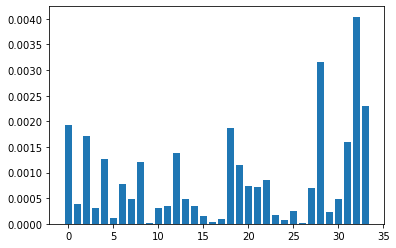

Attribute pat_geslacht_code has squared feature importance difference 0.0024004003353541247
Attribute tum_differentiatiegraad_code has squared feature importance difference 2.208768005086337e-06
Attribute subloc_0 has squared feature importance difference 0.003192642064645892
Attribute subloc_2 has squared feature importance difference 8.785495736123452e-05
Attribute subloc_3 has squared feature importance difference 0.001414233351857584
Attribute subloc_4 has squared feature importance difference 1.292869475418879e-06
Attribute subloc_5 has squared feature importance difference 0.0005047556637300133
Attribute subloc_6 has squared feature importance difference 0.00019702840971127326
Attribute subloc_7 has squared feature importance difference 0.0009610078102725969
Attribute subloc_8 has squared feature importance difference 3.647480478895702e-06
Attribute subloc_9 has squared feature importance difference 1.6165572780183196e-05
Attribute stage_1 has squared feature importance differenc

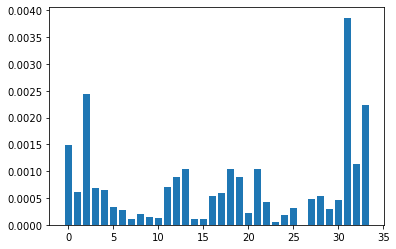

Attribute pat_geslacht_code has squared feature importance difference 0.002063991660688366
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00018467744438143124
Attribute subloc_0 has squared feature importance difference 0.00989263414535676
Attribute subloc_2 has squared feature importance difference 0.0007433854574156678
Attribute subloc_3 has squared feature importance difference 0.00047777346208566825
Attribute subloc_4 has squared feature importance difference 7.167772273464623e-05
Attribute subloc_5 has squared feature importance difference 5.750751188200722e-05
Attribute subloc_6 has squared feature importance difference 3.7670490960632313e-06
Attribute subloc_7 has squared feature importance difference 1.7570028621587324e-06
Attribute subloc_8 has squared feature importance difference 1.5074872223443004e-05
Attribute subloc_9 has squared feature importance difference 2.0735921676563366e-06
Attribute stage_1 has squared feature importance differ

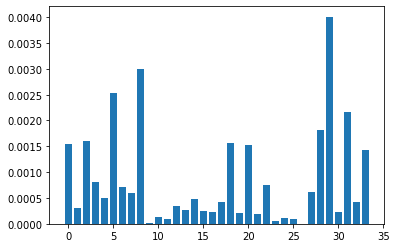

Attribute pat_geslacht_code has squared feature importance difference 0.001359572639979971
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.0704479370083747e-06
Attribute subloc_0 has squared feature importance difference 0.0028945365289551393
Attribute subloc_2 has squared feature importance difference 0.0007252771383321906
Attribute subloc_3 has squared feature importance difference 0.00016135407576153645
Attribute subloc_4 has squared feature importance difference 0.006734905349600397
Attribute subloc_5 has squared feature importance difference 0.00043415503381469565
Attribute subloc_6 has squared feature importance difference 0.0003281715748637673
Attribute subloc_7 has squared feature importance difference 0.008827797856887374
Attribute subloc_8 has squared feature importance difference 3.7397802460194406e-06
Attribute subloc_9 has squared feature importance difference 3.60003238432267e-06
Attribute stage_1 has squared feature importance differenc

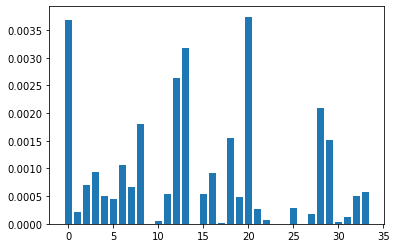

Attribute pat_geslacht_code has squared feature importance difference 0.01205666055657806
Attribute tum_differentiatiegraad_code has squared feature importance difference 2.1638296621142757e-05
Attribute subloc_0 has squared feature importance difference 0.0004920161725601296
Attribute subloc_2 has squared feature importance difference 0.0009601523408929836
Attribute subloc_3 has squared feature importance difference 0.0001477678021706932
Attribute subloc_4 has squared feature importance difference 0.00010240511673836574
Attribute subloc_5 has squared feature importance difference 0.0010616996167203622
Attribute subloc_6 has squared feature importance difference 0.0004098467363211185
Attribute subloc_7 has squared feature importance difference 0.002708861568041048
Attribute subloc_8 has squared feature importance difference 5.012892785202917e-06
Attribute subloc_9 has squared feature importance difference 2.4276940472131426e-05
Attribute stage_1 has squared feature importance differenc

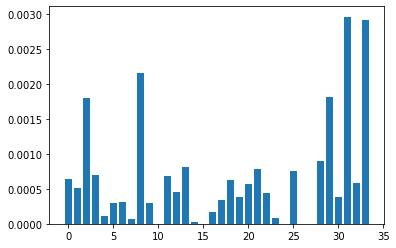

Attribute pat_geslacht_code has squared feature importance difference 0.0001516178787077236
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0001232100231023083
Attribute subloc_0 has squared feature importance difference 0.0060951321504899405
Attribute subloc_2 has squared feature importance difference 0.0009126663640775208
Attribute subloc_3 has squared feature importance difference 4.58384256272323e-11
Attribute subloc_4 has squared feature importance difference 5.7388895815242786e-05
Attribute subloc_5 has squared feature importance difference 9.510126328134567e-05
Attribute subloc_6 has squared feature importance difference 1.1742492455762608e-06
Attribute subloc_7 has squared feature importance difference 0.007461989223596616
Attribute subloc_8 has squared feature importance difference 0.00012025170912642117
Attribute subloc_9 has squared feature importance difference 4.370597286266319e-05
Attribute stage_1 has squared feature importance differen

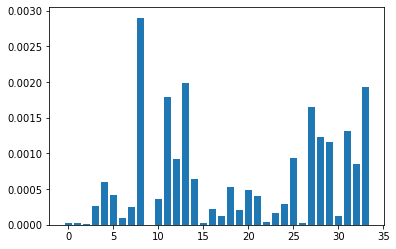

Attribute pat_geslacht_code has squared feature importance difference 0.00022069907909843416
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00011508997793364476
Attribute subloc_0 has squared feature importance difference 6.63240135310592e-07
Attribute subloc_2 has squared feature importance difference 0.00012722445500614387
Attribute subloc_3 has squared feature importance difference 0.0005074410623387871
Attribute subloc_4 has squared feature importance difference 0.00018351494582990546
Attribute subloc_5 has squared feature importance difference 1.6248539155890055e-08
Attribute subloc_6 has squared feature importance difference 7.850511723366975e-05
Attribute subloc_7 has squared feature importance difference 0.014972669915020555
Attribute subloc_8 has squared feature importance difference 5.615967812299974e-06
Attribute subloc_9 has squared feature importance difference 9.85850772837214e-05
Attribute stage_1 has squared feature importance differe

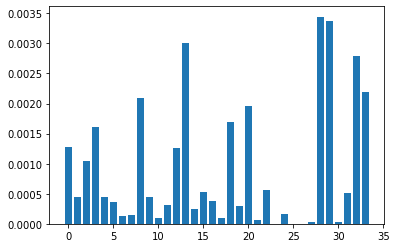

Attribute pat_geslacht_code has squared feature importance difference 0.000636913525207801
Attribute tum_differentiatiegraad_code has squared feature importance difference 7.28475242787095e-06
Attribute subloc_0 has squared feature importance difference 0.0010302649863792729
Attribute subloc_2 has squared feature importance difference 0.0025762080619807825
Attribute subloc_3 has squared feature importance difference 9.00729871489598e-05
Attribute subloc_4 has squared feature importance difference 4.0562275971762995e-05
Attribute subloc_5 has squared feature importance difference 8.254401740233148e-13
Attribute subloc_6 has squared feature importance difference 7.456201232578437e-06
Attribute subloc_7 has squared feature importance difference 0.003375931392939593
Attribute subloc_8 has squared feature importance difference 0.0001481559396040389
Attribute subloc_9 has squared feature importance difference 1.3906826797688289e-05
Attribute stage_1 has squared feature importance difference 

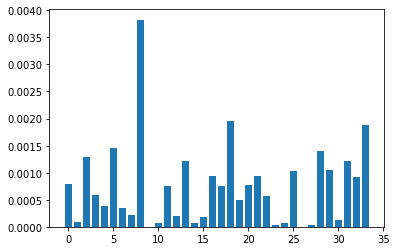

Attribute pat_geslacht_code has squared feature importance difference 0.00020825750209270587
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.702372005469179e-05
Attribute subloc_0 has squared feature importance difference 0.0023565210585286354
Attribute subloc_2 has squared feature importance difference 0.0004905369804039667
Attribute subloc_3 has squared feature importance difference 9.970280097690259e-05
Attribute subloc_4 has squared feature importance difference 0.002671279138577249
Attribute subloc_5 has squared feature importance difference 9.015762820672108e-05
Attribute subloc_6 has squared feature importance difference 4.220472701907948e-05
Attribute subloc_7 has squared feature importance difference 0.019530401946708867
Attribute subloc_8 has squared feature importance difference 5.571652151451462e-06
Attribute subloc_9 has squared feature importance difference 1.6907988541754875e-05
Attribute stage_1 has squared feature importance differenc

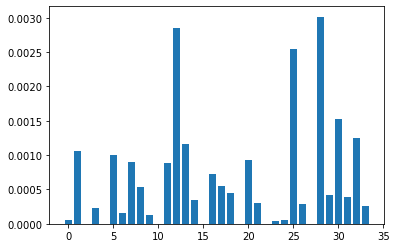

Attribute pat_geslacht_code has squared feature importance difference 0.00018862842631471789
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0013340302199119172
Attribute subloc_0 has squared feature importance difference 2.0955708560875553e-06
Attribute subloc_2 has squared feature importance difference 8.748480568004605e-05
Attribute subloc_3 has squared feature importance difference 2.3075475633317832e-05
Attribute subloc_4 has squared feature importance difference 0.0016374566164747033
Attribute subloc_5 has squared feature importance difference 1.2176428883309064e-05
Attribute subloc_6 has squared feature importance difference 0.0014717089510825104
Attribute subloc_7 has squared feature importance difference 0.00021249303676073005
Attribute subloc_8 has squared feature importance difference 1.0674884237071211e-05
Attribute subloc_9 has squared feature importance difference 4.370597286266319e-05
Attribute stage_1 has squared feature importance dif

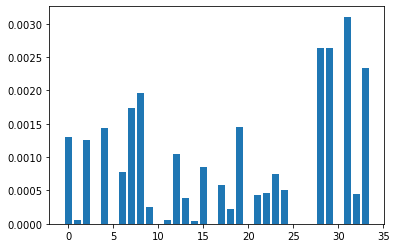

Attribute pat_geslacht_code has squared feature importance difference 0.0010562988322437275
Attribute tum_differentiatiegraad_code has squared feature importance difference 9.597253845195991e-05
Attribute subloc_0 has squared feature importance difference 0.002080564260482832
Attribute subloc_2 has squared feature importance difference 7.990032128118225e-07
Attribute subloc_3 has squared feature importance difference 0.0023806619497625473
Attribute subloc_4 has squared feature importance difference 2.788395039922382e-05
Attribute subloc_5 has squared feature importance difference 0.0006268199863116972
Attribute subloc_6 has squared feature importance difference 0.0039016555646848305
Attribute subloc_7 has squared feature importance difference 0.004078817520819269
Attribute subloc_8 has squared feature importance difference 5.0126642719982386e-05
Attribute subloc_9 has squared feature importance difference 4.370597286266319e-05
Attribute stage_1 has squared feature importance difference

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

Only one class left in synthetic dataset, no Logistic Regression possible. Coefficients are set to 0
Attribute pat_geslacht_code has squared feature importance difference 0.0010562988322437275
Attribute tum_differentiatiegraad_code has squared feature importance difference 9.597253845195991e-05
Attribute subloc_0 has squared feature importance difference 0.002080564260482832
Attribute subloc_2 has squared feature importance difference 7.990032128118225e-07
Attribute subloc_3 has squared feature importance difference 0.0023806619497625473
Attribute subloc_4 has squared feature importance difference 2.788395039922382e-05
Attribute subloc_5 has squared feature importance difference 0.0006268199863116972
Attribute subloc_6 has squared feature importance difference 0.0039016555646848305
Attribute subloc_7 has squared feature importance difference 0.004078817520819269
Attribute subloc_8 has squared feature importance difference 5.0126642719982386e-05
Attribute subloc_9 has squared feature im

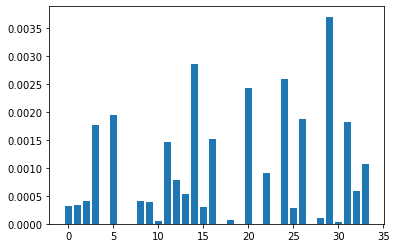

Attribute pat_geslacht_code has squared feature importance difference 2.5338149107708806e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 5.791485396458859e-09
Attribute subloc_0 has squared feature importance difference 0.00015942806765083844
Attribute subloc_2 has squared feature importance difference 0.0037248601104903274
Attribute subloc_3 has squared feature importance difference 2.3075475633317832e-05
Attribute subloc_4 has squared feature importance difference 0.003994816809100752
Attribute subloc_5 has squared feature importance difference 1.5396791559596125e-05
Attribute subloc_6 has squared feature importance difference 4.990718917179021e-06
Attribute subloc_7 has squared feature importance difference 2.3049946369256346e-05
Attribute subloc_8 has squared feature importance difference 0.00012320776750443985
Attribute subloc_9 has squared feature importance difference 2.258526943363741e-05
Attribute stage_1 has squared feature importance diff

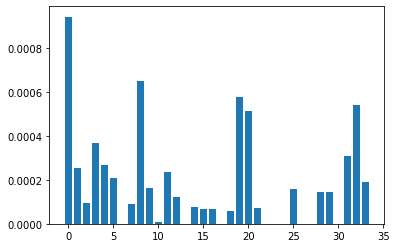

Attribute pat_geslacht_code has squared feature importance difference 0.0177637727612703
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0007952597406663182
Attribute subloc_0 has squared feature importance difference 0.0001795324737981012
Attribute subloc_2 has squared feature importance difference 0.003286976385470667
Attribute subloc_3 has squared feature importance difference 0.001400822455609655
Attribute subloc_4 has squared feature importance difference 0.0007573844818281309
Attribute subloc_5 has squared feature importance difference 1.5396791559596125e-05
Attribute subloc_6 has squared feature importance difference 0.0001416825560817144
Attribute subloc_7 has squared feature importance difference 0.008707782678934923
Attribute subloc_8 has squared feature importance difference 0.0005438800111709352
Attribute subloc_9 has squared feature importance difference 2.710509589898047e-05
Attribute stage_1 has squared feature importance difference 0.0

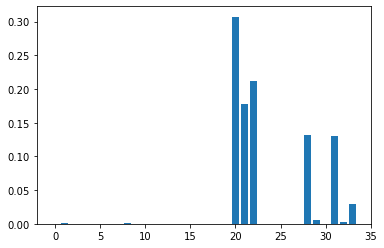

syn: DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=0.005)
Feature: pat_geslacht_code Score: 0.00000
Feature: tum_differentiatiegraad_code Score: 0.00000
Feature: subloc_0 Score: 0.00000
Feature: subloc_2 Score: 0.00000
Feature: subloc_3 Score: 0.00000
Feature: subloc_4 Score: 0.00000
Feature: subloc_5 Score: 0.00000
Feature: subloc_6 Score: 0.00000
Feature: subloc_7 Score: 0.00000
Feature: subloc_8 Score: 0.00000
Feature: subloc_9 Score: 0.00000
Feature: stage_1 Score: 0.00000
Feature: stage_2 Score: 0.00000
Feature: stage_2A Score: 0.00000
Feature: stage_2B Score: 0.00000
Feature: stage_2C Score: 0.00000
Feature: stage_3 Score: 0.00000
Feature: stage_3A Score: 1.00000
Feature: stage_3B Score: 0.00000
Feature: stage_3C Score: 0.00000
Feature: stage_4 Score: 0.00000
Feature: stage_4A Score: 0.00000
Feature: stage_4B Score: 0.00000
Feature: stage_4C Score: 0.00000
Feature: stage_M Score: 0.00000
Feature: stage_X Score: 0.00000
Feature: diagnosis_age_0-20 Score

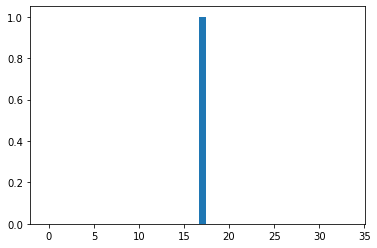

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

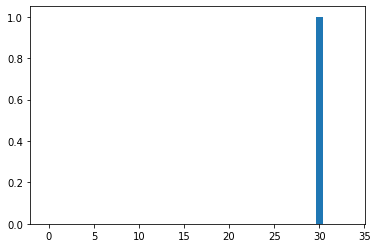

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

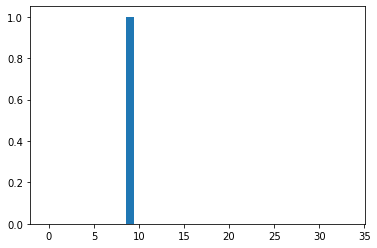

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 1.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

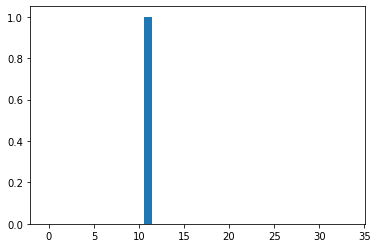

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 1.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

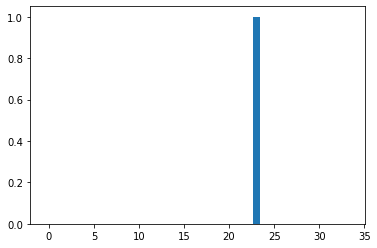

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

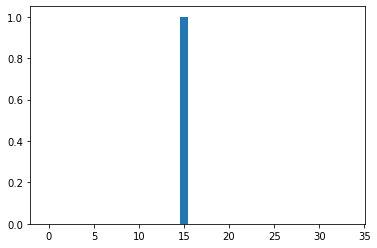

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

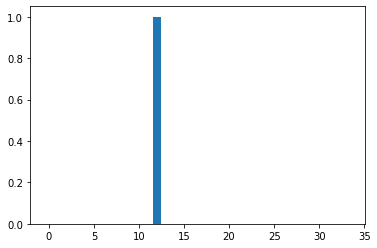

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 1.0
Attribute stage_2A has squared feature importance differ

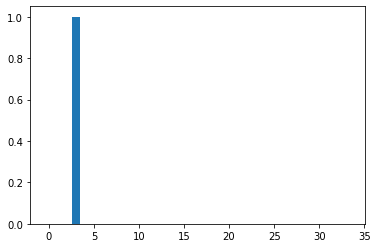

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 1.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

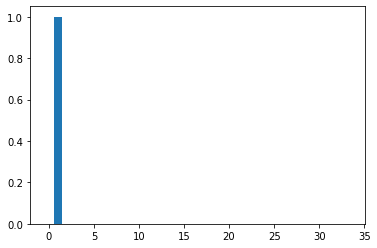

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.9981959652696472
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differenc

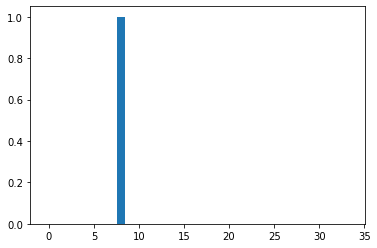

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.9981249962834433
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differenc

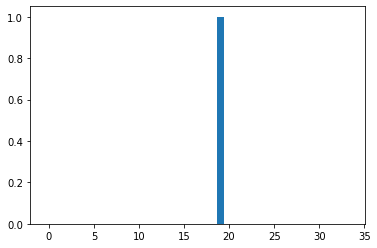

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

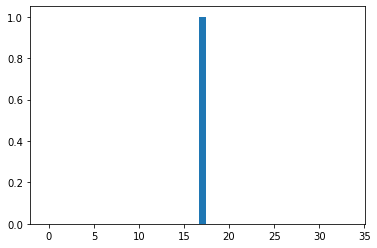

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

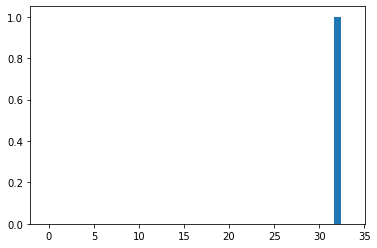

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

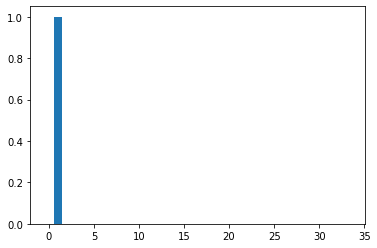

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.9981959652696472
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differenc

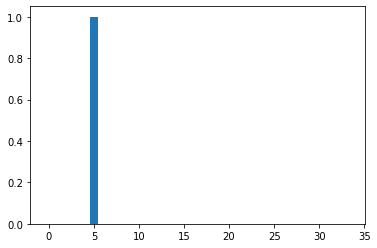

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 1.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

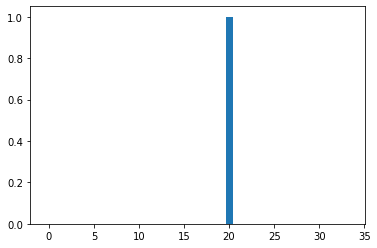

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

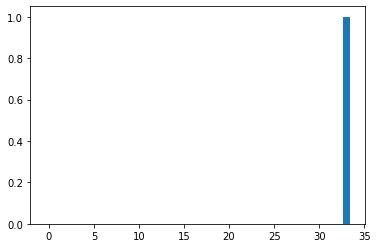

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

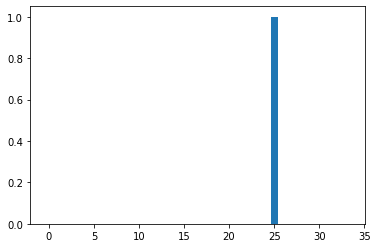

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

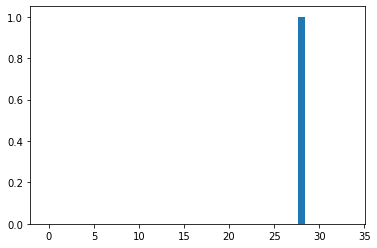

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

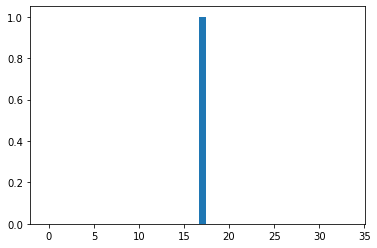

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

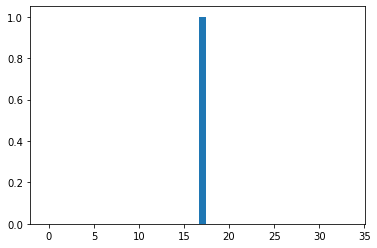

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

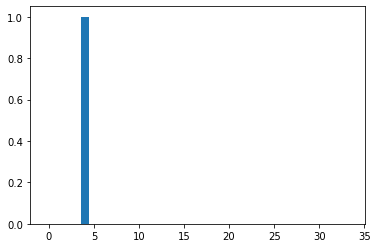

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 1.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

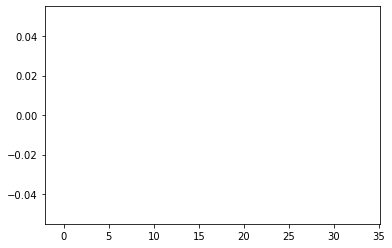

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

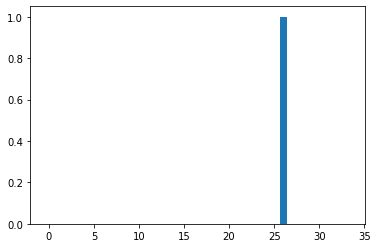

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

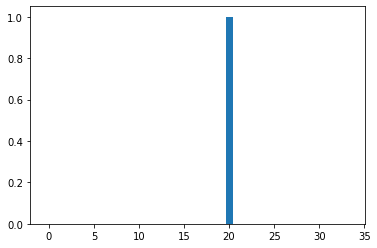

Attribute pat_geslacht_code has squared feature importance difference 3.79147693512754e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.143700688232475e-07
Attribute subloc_0 has squared feature importance difference 1.5539355023061766e-09
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.797346806565952e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

In [14]:
# Do for one DP algorithm at a time for normalized coefficients
privacy_levels = ms_privacy_levels

norm_ms_FID_ORI, norm_ms_FID, norm_ms_FID_ERRORS = NormalizedFIDmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

In [15]:
labels = ['very low', 'low', 'medium', 'high', 'very high']

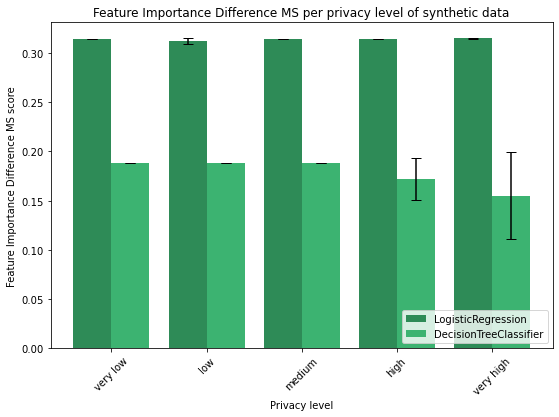

In [16]:
QMbar_one_DP_alg(QM=ms_FID, QMerror = ms_FID_ERRORS, QMname='Feature Importance Difference MS', labels=labels)

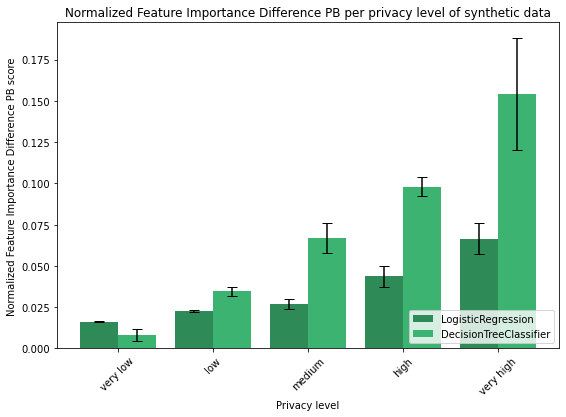

In [17]:
# Barplot for normalized results
QMbar_one_DP_alg(QM=norm_pb_FID, QMerror = norm_pb_FID_ERRORS, QMname='Normalized Feature Importance Difference PB', labels=labels)

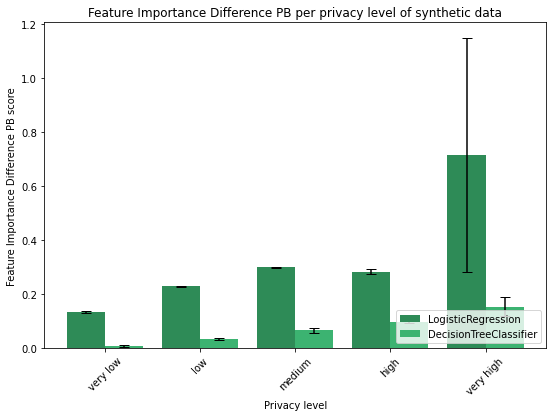

In [18]:
QMbar_one_DP_alg(QM=pb_FID, QMerror = pb_FID_ERRORS, QMname='Feature Importance Difference PB', labels=labels)

# Combined visualization

In [19]:
QM_FID_ori = ms_FID_ORI+pb_FID_ORI
QM_FID = ms_FID+pb_FID
QM_FID_error = ms_FID_ERRORS+pb_FID_ERRORS

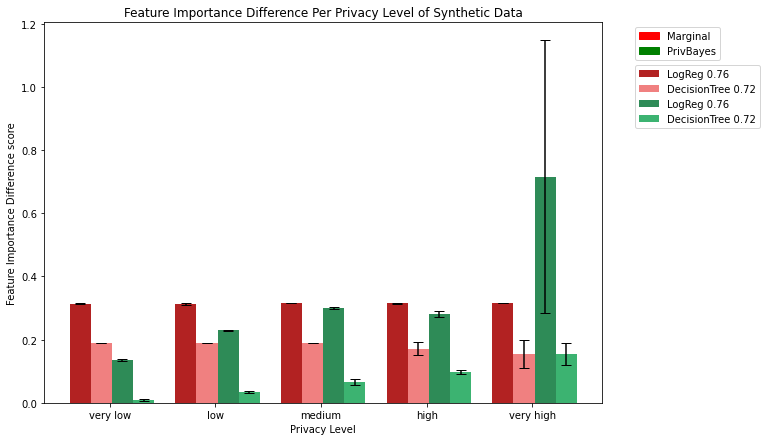

In [20]:
fig = QMbar_two_DP_algs(QM=QM_FID, QMerror = QM_FID_error, QMname='Feature Importance Difference', QMori = QM_FID_ori, labels=labels)
fig.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Final Result Feature Importance Difference-subset_1.png', bbox_inches='tight', dpi=100)

In [21]:
# Normalized combined visualization
norm_QM_FID_ori = norm_ms_FID_ORI+norm_pb_FID_ORI
norm_QM_FID = norm_ms_FID+norm_pb_FID
norm_QM_FID_error = norm_ms_FID_ERRORS+norm_pb_FID_ERRORS

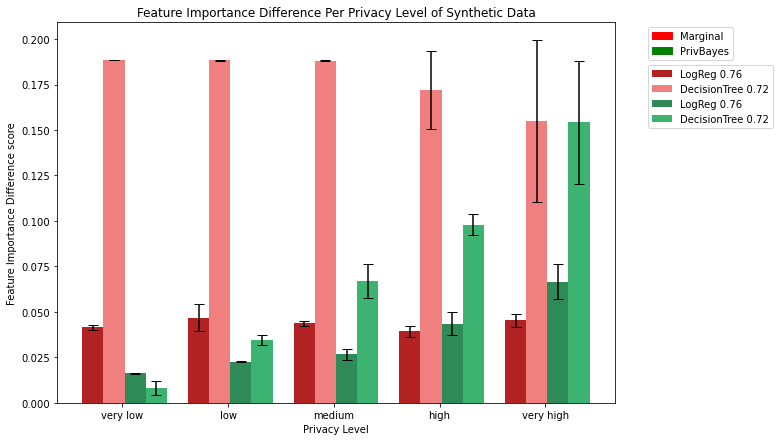

In [22]:
fig = QMbar_two_DP_algs(QM=norm_QM_FID, QMerror = norm_QM_FID_error, QMname='Feature Importance Difference', QMori = norm_QM_FID_ori, labels=labels)
fig.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Final Result Normalized Feature Importance Difference-subset_1.png', bbox_inches='tight', dpi=100)